#**Machine Learning with Deep Neural Networks** 



In [ ]:
# from sklearn import datasets
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
# using for handeling imbalanced data
import math
# for finding the number of labels
from collections import Counter 
#Keras model Module
from keras.models import Sequential
#Keras Core Layers
from keras.layers import Dense, Dropout, Activation, Flatten
#Keras CNN Layers
from keras.layers import Conv2D, Convolution2D, MaxPooling2D
#utilities
from keras.utils import np_utils
from keras.datasets import mnist
import keras
from keras.utils.data_utils import get_file
from keras import backend as K
from keras import layers
# Evaluation
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix,classification_report
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

In [ ]:
# Loading data
dermaMNIST_data = np.load(get_file(origin = 'https://raw.githubusercontent.com/ladan888/Machine-Learning_assignment2/main/dermamnist.npz'))
retinaMNIST_data = np.load(get_file(origin = 'https://raw.githubusercontent.com/ladan888/Machine-Learning_assignment2/main/retinamnist.npz'))

In [ ]:
# Make a Dataframe
# this will load the npz file with the labels as index[1]
df_derma= pd.DataFrame.from_dict({item: dermaMNIST_data[item] for item in dermaMNIST_data.files}, orient='index')
df_retina= pd.DataFrame.from_dict({item: retinaMNIST_data[item] for item in retinaMNIST_data.files}, orient='index')

/usr/local/lib/python3.7/dist-packages/pandas/core/internals/construction.py:540: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  values = np.array([convert(v) for v in values])


In [ ]:
# The output of these two line are the same
print("Derma dataset key values  : ",dermaMNIST_data.files)
print("Retina dataset key values : ",retinaMNIST_data.files)

Derma dataset key values  :  ['train_images', 'val_images', 'test_images', 'train_labels', 'val_labels', 'test_labels']
Retina dataset key values :  ['train_images', 'val_images', 'test_images', 'train_labels', 'val_labels', 'test_labels']


In [ ]:
print("Shape of Derma Dataset: ")
print("The shape of train images is : ",  dermaMNIST_data['train_images'].shape)
print("The shape of val images is   : ",    dermaMNIST_data['val_images'].shape)
print("The shape of test images is  : ",   dermaMNIST_data['test_images'].shape)
print("The shape of train labels is : ",  dermaMNIST_data['train_labels'].shape)
print("The shape of val labels is   : ",    dermaMNIST_data['val_labels'].shape)
print("The shape of test labels is  : ",   dermaMNIST_data['test_labels'].shape)
################################################################################
print("\nShape of Retina Dataset: ")
print("The shape of train images is : ",  retinaMNIST_data['train_images'].shape)
print("The shape of val images is   : ",    retinaMNIST_data['val_images'].shape)
print("The shape of test images is  : ",   retinaMNIST_data['test_images'].shape)
print("The shape of train labels is : ",  retinaMNIST_data['train_labels'].shape)
print("The shape of val labels is   : ",    retinaMNIST_data['val_labels'].shape)
print("The shape of test labels is  : ",   retinaMNIST_data['test_labels'].shape)

Shape of Derma Dataset: 
The shape of train images is :  (7007, 28, 28, 3)
The shape of val images is   :  (1003, 28, 28, 3)
The shape of test images is  :  (2005, 28, 28, 3)
The shape of train labels is :  (7007, 1)
The shape of val labels is   :  (1003, 1)
The shape of test labels is  :  (2005, 1)

Shape of Retina Dataset: 
The shape of train images is :  (1080, 28, 28, 3)
The shape of val images is   :  (120, 28, 28, 3)
The shape of test images is  :  (400, 28, 28, 3)
The shape of train labels is :  (1080, 1)
The shape of val labels is   :  (120, 1)
The shape of test labels is  :  (400, 1)


In [ ]:
# Checking null values in the derma dataframe
# df_derma.isnull().sum().sum()
df_derma.isnull()

,0
train_images,False
val_images,False
test_images,False
train_labels,False
val_labels,False
test_labels,False


In [ ]:
# Checking null values in the Retina dataframe
# df_retina.isnull().sum().sum()
df_retina.isnull()

,0
train_images,False
val_images,False
test_images,False
train_labels,False
val_labels,False
test_labels,False


In [ ]:
df_derma

,0
train_images,"[[[[158 111 117], [161 116 121], [164 121 130]..."
val_images,"[[[[240 150 149], [240 150 149], [238 148 147]..."
test_images,"[[[[238 182 181], [231 175 174], [233 175 174]..."
train_labels,"[[0], [5], [5], [5], [4], [5], [4], [5], [5], ..."
val_labels,"[[5], [5], [5], [5], [5], [4], [5], [5], [5], ..."
test_labels,"[[5], [3], [4], [0], [5], [5], [5], [4], [5], ..."


In [ ]:
# print the data in the dataset
show_data_derma = dermaMNIST_data.files
for item in show_data_derma:
    print(item)
    print(dermaMNIST_data[item])

train_images
[[[[158 111 117]
   [161 116 121]
   [164 121 130]
   ...
   [189 160 164]
   [187 158 160]
   [186 157 159]]

  [[160 113 119]
   [165 120 125]
   [170 129 137]
   ...
   [191 162 166]
   [189 160 162]
   [188 159 161]]

  [[164 119 124]
   [170 128 132]
   [177 137 145]
   ...
   [191 162 166]
   [188 162 165]
   [187 161 164]]

  ...

  [[172 142 150]
   [176 147 152]
   [182 150 155]
   ...
   [195 167 164]
   [181 153 150]
   [171 143 140]]

  [[176 147 152]
   [176 147 152]
   [180 148 153]
   ...
   [188 160 157]
   [178 150 147]
   [171 143 140]]

  [[175 146 151]
   [173 144 149]
   [174 142 147]
   ...
   [180 152 149]
   [175 147 144]
   [173 145 142]]]


 [[[230 111 105]
   [226 107  99]
   [225 106  98]
   ...
   [217 113 102]
   [215 111 100]
   [213 109  98]]

  [[225 106 100]
   [221 102  94]
   [220 102  92]
   ...
   [218 114 103]
   [216 112 101]
   [215 111 100]]

  [[222 103  97]
   [218  99  91]
   [217 100  90]
   ...
   [219 115 104]
   [217 115 103

In [ ]:
# print the data in the dataset
show_data_retinal = retinaMNIST_data.files
for item in show_data_retinal:
    print(item)
    print(retinaMNIST_data[item])

train_images
[[[[ 2  0  6]
   [ 4  3  9]
   [ 4  3  8]
   ...
   [ 0  3  9]
   [ 0  3  9]
   [ 0  3  7]]

  [[ 7  4 11]
   [ 0  0  5]
   [ 0  0  4]
   ...
   [ 0  2  9]
   [ 0  1  6]
   [ 0  1  4]]

  [[ 6  5 11]
   [ 0  0  5]
   [ 0  0  4]
   ...
   [ 2  1  6]
   [ 1  2  6]
   [ 1  2  4]]

  ...

  [[ 0  0  2]
   [ 1  0  0]
   [ 3  0  0]
   ...
   [ 1  0  5]
   [ 1  0  6]
   [ 1  0  6]]

  [[ 4  2  3]
   [ 1  0  0]
   [ 3  0  0]
   ...
   [ 1  0  6]
   [ 1  0  6]
   [ 0  0  8]]

  [[10  8  9]
   [ 2  1  0]
   [ 3  0  0]
   ...
   [ 1  0  6]
   [ 0  0  8]
   [ 0  0  8]]]


 [[[ 3  0 11]
   [ 3  0  9]
   [ 3  0  9]
   ...
   [ 0  5  0]
   [ 0  4  0]
   [ 0  3  0]]

  [[ 4  1 12]
   [ 5  2 11]
   [ 5  2  9]
   ...
   [ 0  6  0]
   [ 0  4  0]
   [ 0  3  0]]

  [[ 2  1  9]
   [ 6  3 12]
   [ 6  3 10]
   ...
   [ 0  3  0]
   [ 0  3  0]
   [ 0  2  0]]

  ...

  [[ 1  9  0]
   [ 1  9  0]
   [ 3  6  0]
   ...
   [ 4  0  0]
   [ 2  1  0]
   [ 1  1  0]]

  [[ 0  6  0]
   [ 0  8  0]
   [ 4  7  0]

#Pre-Processing

In [ ]:
# Special name for each part of the data
# DermaMNIST
for var in show_data_derma:
  X_train_derma  =   dermaMNIST_data['train_images']
  y_train_derma  =   dermaMNIST_data['train_labels']
  X_val_derma    =   dermaMNIST_data['val_images']
  X_test_derma   =   dermaMNIST_data['test_images']
  y_test_derma   =   dermaMNIST_data['test_labels']
  y_val_derma    =   dermaMNIST_data['val_labels']

# RetinaMNIST
for var in show_data_derma:
  X_train_retina  =  retinaMNIST_data['train_images']
  y_train_retina  =  retinaMNIST_data['train_labels']
  X_val_retina    =  retinaMNIST_data['val_images']
  X_test_retina   =  retinaMNIST_data['test_images']
  y_test_retina   =  retinaMNIST_data['test_labels']
  y_val_retina    =  retinaMNIST_data['val_labels']

# Plotting Ground Truth
For what we want to do, 7007(Derma) or 1080(Retina) is way too much, so we're going to start by selecting a subset of the dataset [2]:



* Derma

In [ ]:
# The variety of train lables in derma dataset
print(np.unique(dermaMNIST_data['train_labels']))

[0 1 2 3 4 5 6]


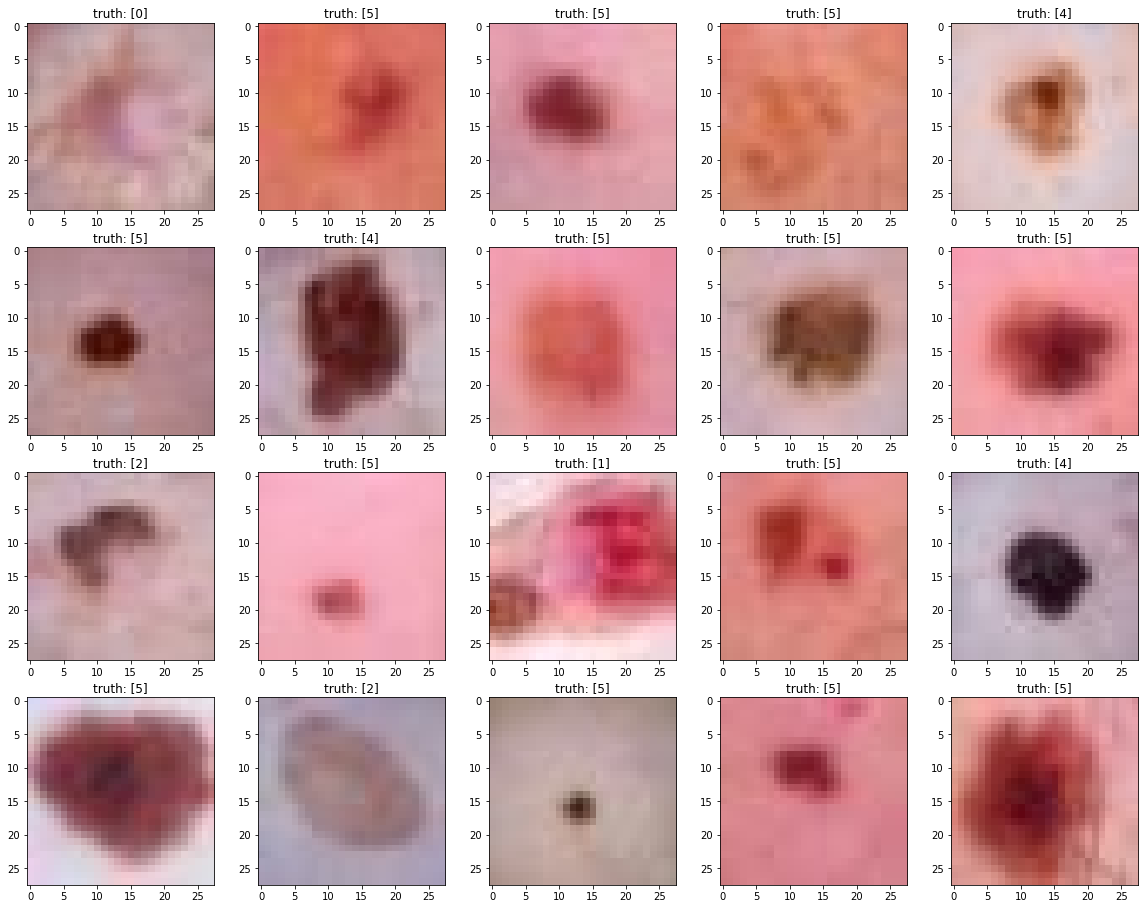

In [ ]:
# Plotting first 20 grund truth of Derma dataset
nsamples = 5000
data_d = X_train_derma[:nsamples]
labels_d = y_train_derma[:nsamples]

#Then, we do a bit of preprocessing:
# 1)normalize grayscale levels to 1.
# 2)convert labels from strings to integers
# 3)create an array of images for plotting, in which the 28x28x3 pixel structure is restored
data_d = data_d / 255.
labels_d = labels_d.astype('int')
images_d = data_d.reshape(data_d.shape[0], 28, 28,3)

#Plot
#Each image has a given grayscale value in each of the 2352 pixels
plt.figure(figsize=(20,20))
for i in range(20):
    plt.subplot(5,5,i+1)
    plt.imshow(images_d[i])
    plt.title('truth: {}'.format(labels_d[i]))

* Retina

In [ ]:
# The variety of train lables in retina dataset
print(np.unique(retinaMNIST_data['train_labels']))

[0 1 2 3 4]


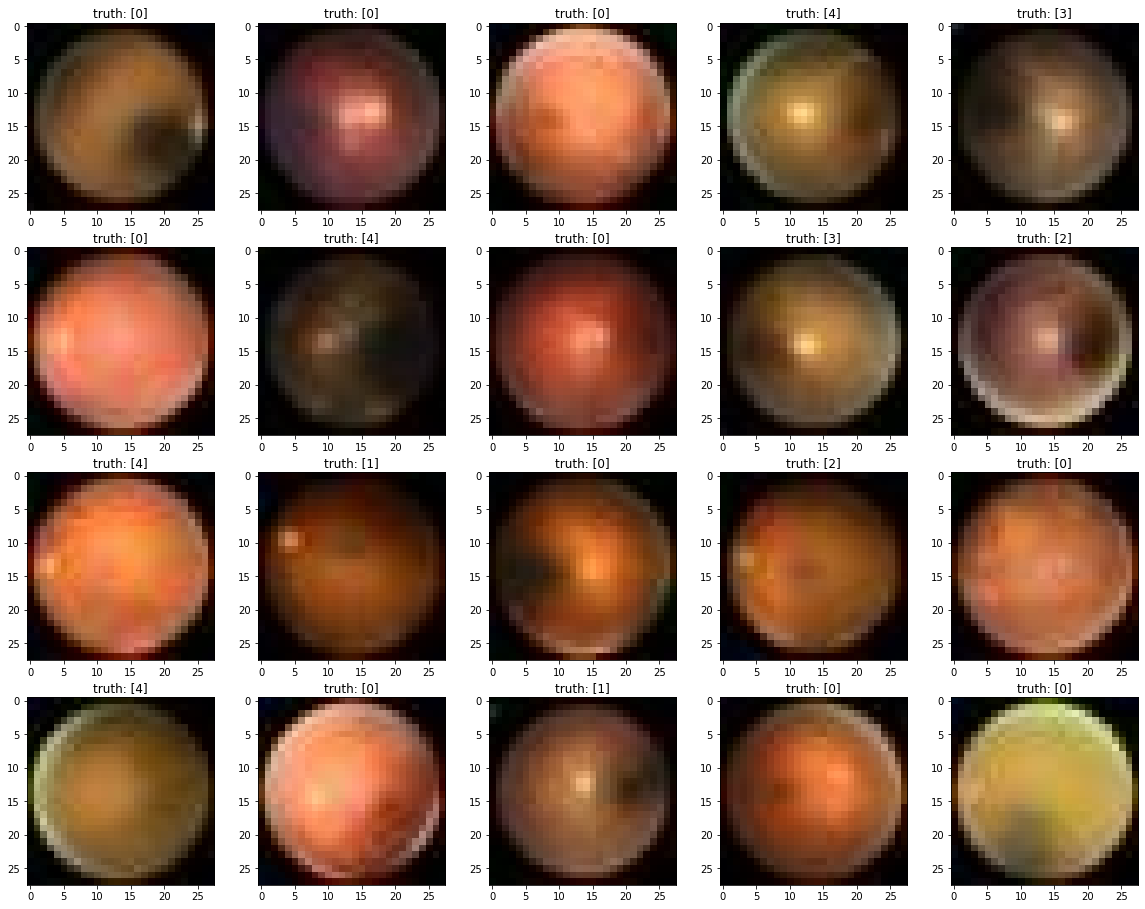

In [ ]:
# Plotting first 20 grund truth of Retina dataset
nsamples = 5000
data_r = retinaMNIST_data["train_images"][:nsamples]
labels_r = retinaMNIST_data["train_labels"][:nsamples]

#Then, we do a bit of preprocessing:
# 1)normalize grayscale levels to 1.
# 2)convert labels from strings to integers
# 3)create an array of images for plotting, in which the 28x28x3 pixel structure is restored
data_r = data_r / 255.
labels_r = labels_r.astype('int')
images_r = data_r.reshape(data_r.shape[0], 28, 28,3)

#Plot
#Each image has a given grayscale value in each of the 2352 pixels
plt.figure(figsize=(20,20))
for i in range(20):
    plt.subplot(5,5,i+1)
    plt.imshow(images_r[i])
    plt.title('truth: {}'.format(labels_r[i]))

 * It appears that we have 7007 & 1080 samples in our training set for Derma and Retina respectively, and the images are 28 pixels x 28 pixels x 3 colors(RGB) each. We can confirm this by plotting the first sample in matplotlib which is shown below:

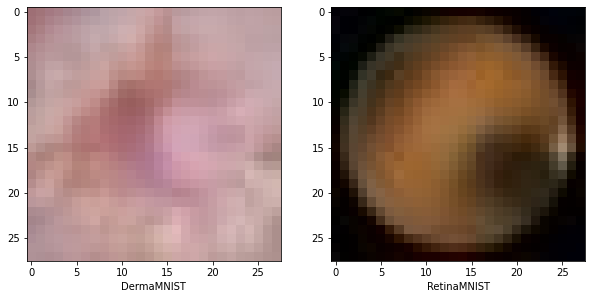

In [ ]:
# Plotting Derma dataset
fig=plt.figure(figsize=(10,10))
plt.subplot(121)
plt.imshow(X_train_derma[0]) 
plt.xlabel("DermaMNIST")

# Plotting Retina dataset
plt.subplot(122)
plt.imshow(X_train_retina[0])
plt.xlabel("RetinaMNIST")

plt.show()

# Format the data for training
Our neural-network is going to take a single vector for each training example, so we need to reshape the input so that each 28x28x3 image becomes a single 2352 dimensional vector. We'll also scale the inputs to be in the range [0-1] rather than [0-255].[3]



In [ ]:
# Pre-Processing for Derma dataset
X_train_derma = X_train_derma.reshape(7007, 2352)
X_test_derma = X_test_derma.reshape(2005, 2352)
X_val_derma = X_val_derma.reshape(1003, 2352)

#################################################
# Pre-Processing for Retina dataset
X_train_retina = X_train_retina.reshape(1080, 2352)
X_test_retina = X_test_retina.reshape(400, 2352)
X_val_retina = X_val_retina.reshape(120, 2352)

#################################################
print("Matrices of DermaMNIST :")
print("Training matrix shape", X_train_derma.shape)
print("Testing matrix shape", X_test_derma.shape)
print("Val matrix shape", X_val_derma.shape)

print("\nMatrices of RetinaMNIST :")
print("Training matrix shape", X_train_retina.shape)
print("Testing matrix shape", X_test_retina.shape)
print("Val matrix shape", X_val_retina.shape)

Matrices of DermaMNIST :
Training matrix shape (7007, 2352)
Testing matrix shape (2005, 2352)
Val matrix shape (1003, 2352)

Matrices of RetinaMNIST :
Training matrix shape (1080, 2352)
Testing matrix shape (400, 2352)
Val matrix shape (120, 2352)


# Handling Imbalanced Data
Is our data imbalanced? Yes. [4]




In [ ]:
# Derma
x1 = list(df_derma[0][3].reshape(7007)) 
N = Counter(x1)
print(Counter(x1))

Counter({5: 4693, 4: 779, 2: 769, 1: 359, 0: 228, 6: 99, 3: 80})


In [ ]:
# Retina
x2 = list(df_retina[0][3].reshape(1080))
M = Counter(x2)
print(Counter(x2))

Counter({0: 486, 2: 206, 3: 194, 1: 128, 4: 66})


In [ ]:
# Derma
TN = list(np.unique(dermaMNIST_data['train_labels']))
# Retina
TM = list(np.unique(retinaMNIST_data['train_labels']))
TN

[0, 1, 2, 3, 4, 5, 6]

* Finding weights for Derma lables

In [ ]:
def create_class_weight(N,mu=0.15):
    total = np.sum(list(N.values()))
    keys = N.keys()
    class_weight = dict()
    
    for key in keys:
        score = math.log(mu*total/float(N[key]))
        class_weight[key] = score if score > 1.0 else 1.0
    
    return class_weight
W1 = create_class_weight(N)
W1

{0: 1.5281993145302117,
 1: 1.0742225549963738,
 2: 1.0,
 3: 2.575518308810771,
 4: 1.0,
 5: 1.0,
 6: 2.3624250933500623}

* Finding weights for Retina lables

In [ ]:
nTotal = y_train_retina.size

W2 = {i: (nTotal - M[TM[i]]) / (2 * nTotal) for i in range(5)}
W2

{0: 0.275,
 1: 0.44074074074074077,
 2: 0.4046296296296296,
 3: 0.4101851851851852,
 4: 0.46944444444444444}

# Deal with imbalanced data- Second way
* Derma

In [ ]:
#Random under-sampling with imblearn[5]
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42, replacement=True)

# fit predictor and target variable
x_rus, y_rus = rus.fit_resample(X_train_derma, y_train_derma)

print('Resample dataset shape', Counter(y_rus))

Resample dataset shape Counter({0: 80, 1: 80, 2: 80, 3: 80, 4: 80, 5: 80, 6: 80})


In [ ]:
#Random over-sampling with imblearn[5]
from imblearn.over_sampling import RandomOverSampler

X_train_derma = X_train_derma.reshape(7007, 2352)
ros = RandomOverSampler(random_state=42)

# fit predictor and target variable
x_train_ros_derma, y_train_ros_derma = ros.fit_resample(X_train_derma, y_train_derma)
x_test_ros_derma, y_test_ros_derma = ros.fit_resample(X_test_derma, y_test_derma)
x_val_ros_derma, y_val_ros_derma = ros.fit_resample(X_val_derma, y_val_derma)

print('Resample dataset shape', Counter(y_train_ros_derma))
print('Resample dataset shape', Counter(y_test_ros_derma))
print('Resample dataset shape', Counter(y_val_ros_derma))

Resample dataset shape Counter({0: 4693, 5: 4693, 4: 4693, 2: 4693, 1: 4693, 6: 4693, 3: 4693})
Resample dataset shape Counter({5: 1341, 3: 1341, 4: 1341, 0: 1341, 2: 1341, 1: 1341, 6: 1341})
Resample dataset shape Counter({5: 671, 4: 671, 2: 671, 6: 671, 1: 671, 0: 671, 3: 671})


* Retina

In [ ]:
#Random under-sampling with imblearn[5]
X_train_retina = X_train_retina.reshape(1080, 2352)
rus_r = RandomUnderSampler(random_state=42, replacement=True)

# fit predictor and target variable
x_rus_retina, y_rus_retina = rus_r.fit_resample(X_train_retina, y_train_retina)

print('Resample dataset shape', Counter(y_rus_retina))

Resample dataset shape Counter({0: 66, 1: 66, 2: 66, 3: 66, 4: 66})


In [ ]:
#Random over-sampling with imblearn[5]
from imblearn.over_sampling import RandomOverSampler

X_train_retina = X_train_retina.reshape(1080, 2352)
ros = RandomOverSampler(random_state=42)

# fit predictor and target variable
x_train_ros_retina, y_train_ros_retina = ros.fit_resample(X_train_retina, y_train_retina)
x_test_ros_retina, y_test_ros_retina = ros.fit_resample(X_test_retina, y_test_retina)
x_val_ros_retina, y_val_ros_retina = ros.fit_resample(X_val_retina, y_val_retina)

print('Resample dataset shape', Counter(y_train_ros_retina))
print('Resample dataset shape', Counter(y_test_ros_retina))
print('Resample dataset shape', Counter(y_val_ros_retina))

Resample dataset shape Counter({0: 486, 4: 486, 3: 486, 2: 486, 1: 486})
Resample dataset shape Counter({2: 174, 1: 174, 0: 174, 3: 174, 4: 174})
Resample dataset shape Counter({0: 54, 2: 54, 1: 54, 3: 54, 4: 54})


#Apply PCA on the dataset

In [ ]:
from sklearn import decomposition
from sklearn.decomposition import PCA

# Derma
pca1=PCA(.95)
pca1.fit(X_train_derma)
# Retina
pca2=PCA(.95)
pca2.fit(X_train_retina)

print( "the number of components for DermaMNIST: ",pca1.n_components_ )
print( "the number of components for RetinaMNIST: ",pca2.n_components_ )

the number of components for DermaMNIST:  35
the number of components for RetinaMNIST:  15


* Plotting PCA on DermaMNIST

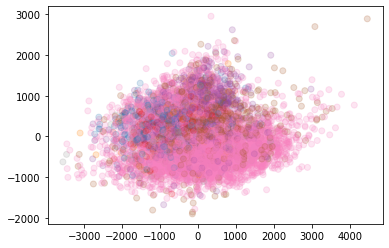

In [ ]:
#That's quite impressive, given the drastic dimensionality reduction we have applied (from 2352 to 35 dimensions).
pca1 = decomposition.PCA(n_components=pca1.n_components_)
X_train_derma_pca = pca1.fit_transform(X_train_derma)
X_test_derma_pca = pca1.transform(X_test_derma)
plt.scatter(X_train_derma_pca[:,0], X_train_derma_pca[:,1], c=y_train_derma, alpha=0.2, cmap='Set1')

* Plotting PCA on RetinaMNIST

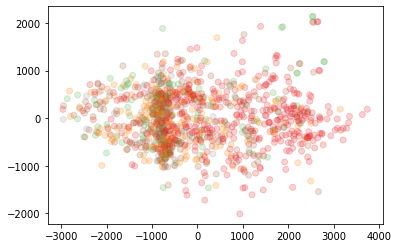

In [ ]:
#That's quite impressive, given the drastic dimensionality reduction we have applied (from 2352 to 15 dimensions).
pca2 = decomposition.PCA(n_components=pca2.n_components_)
X_train_retina_pca = pca2.fit_transform(X_train_retina)
X_test_retina_pca = pca2.transform(X_test_retina)
plt.scatter(X_train_retina_pca[:,0], X_train_retina_pca[:,1], c=y_train_retina, alpha=0.2, cmap='Set1')

#Pre-process class labels
* One-hot encoding

In [ ]:
#The y_train and y_test data are now split into 7 distinct class labels
# Derma Dataset
y_train_derma = np_utils.to_categorical(y_train_derma,7)
y_test_derma = np_utils.to_categorical(y_test_derma,7)
y_val_derma = np_utils.to_categorical(y_val_derma,7)
print("The shape of train labels",y_train_derma.shape)
print("The shape of test labels",y_test_derma.shape)
print("The shape of val labels",y_val_derma.shape)

The shape of train labels (7007, 7)
The shape of test labels (2005, 7)
The shape of val labels (1003, 7)


In [ ]:
#The y_train and y_test data are now split into 5 distinct class labels
# Retina Dataset
y_train_retina = np_utils.to_categorical(y_train_retina,5)
y_test_retina = np_utils.to_categorical(y_test_retina,5)
y_val_retina = np_utils.to_categorical(y_val_retina,5)
print("The shape of train labels",y_train_retina.shape)
print("The shape of test labels",y_test_retina.shape)
print("The shape of val labels",y_val_retina.shape)

The shape of train labels (1080, 5)
The shape of test labels (400, 5)
The shape of val labels (120, 5)


# **Define the First Model for DermaMNIST**

##CNN 
* Derma

In [ ]:
# For CNN we need 4D array, while for MLP we need 2D array
# Pre-Processing for Derma dataset
X_train_derma = X_train_derma.reshape(7007, 28,28,3)
X_test_derma = X_test_derma.reshape(2005, 28,28,3)
X_val_derma = X_val_derma.reshape(1003, 28,28,3)

X_train_derma = X_train_derma.astype('float32')
X_test_derma = X_test_derma.astype('float32')
X_val_derma= X_val_derma.astype('float32')

mu = np.mean(X_train_derma, axis=0)
X_train_derma -= mu
X_test_derma -= mu

X_train_derma /= 255
X_test_derma /= 255
X_val_derma /= 255
#################################################
print("Matrices of DermaMNIST :")
print("Training matrix shape", X_train_derma.shape)
print("Testing matrix shape", X_test_derma.shape)
print("Val matrix shape", X_val_derma.shape)


Matrices of DermaMNIST :
Training matrix shape (7007, 28, 28, 3)
Testing matrix shape (2005, 28, 28, 3)
Val matrix shape (1003, 28, 28, 3)


## Existing model
[6]
* Derma

In [ ]:
# Declare a sequential model
model = Sequential()
# 32 filters and a network of 5X5
model.add(layers.Conv2D(32, (5, 5), activation='relu', input_shape=(28, 28, 3)))
model.add(layers.MaxPooling2D((2, 2)))
# 64 filters and a network of 5X5
model.add(layers.Conv2D(64, (5, 5), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
# change it to 2D array with 7 dense
# Classifier
model.add(layers.Flatten())
model.add(layers.Dense(7, activation="softmax"))

# optimizer = "adam","rmsprop","sgd": but there is no differences between the results
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

#Fit model on training data
history = model.fit(X_train_derma, y_train_derma,
          batch_size=1500,
          epochs=10,
          verbose=1,validation_data=(X_test_derma,y_test_derma))
 
# # Evaluate model on test data
score_derma_exs = model.evaluate(X_test_derma, y_test_derma, verbose=0, batch_size=64)
print('Test loss:', score_derma_exs[0])
print('Test accuracy:', score_derma_exs[1])
print('The error is: %.2f%%'%(100-score_derma_exs[1]*100))

Epoch 1/10
5/5 [==============================] - 1s 63ms/step - loss: 1.4065 - accuracy: 0.5342 - val_loss: 1.0185 - val_accuracy: 0.6688
Epoch 2/10
5/5 [==============================] - 0s 29ms/step - loss: 0.9843 - accuracy: 0.6698 - val_loss: 0.9515 - val_accuracy: 0.6603
Epoch 3/10
5/5 [==============================] - 0s 26ms/step - loss: 0.9695 - accuracy: 0.6676 - val_loss: 0.9141 - val_accuracy: 0.6723
Epoch 4/10
5/5 [==============================] - 0s 26ms/step - loss: 0.9160 - accuracy: 0.6753 - val_loss: 0.9029 - val_accuracy: 0.6848
Epoch 5/10
5/5 [==============================] - 0s 26ms/step - loss: 0.9157 - accuracy: 0.6766 - val_loss: 0.9190 - val_accuracy: 0.6703
Epoch 6/10
5/5 [==============================] - 0s 26ms/step - loss: 0.9065 - accuracy: 0.6763 - val_loss: 0.8791 - val_accuracy: 0.6838
Epoch 7/10
5/5 [==============================] - 0s 26ms/step - loss: 0.8854 - accuracy: 0.6825 - val_loss: 0.9183 - val_accuracy: 0.6718
Epoch 8/10
5/5 [===========

In [ ]:
# Save the model
model.save('cnn_derma_existing.h5')

## Plotting the Loss and Accuracy 
[7]
* Derma(existing model)

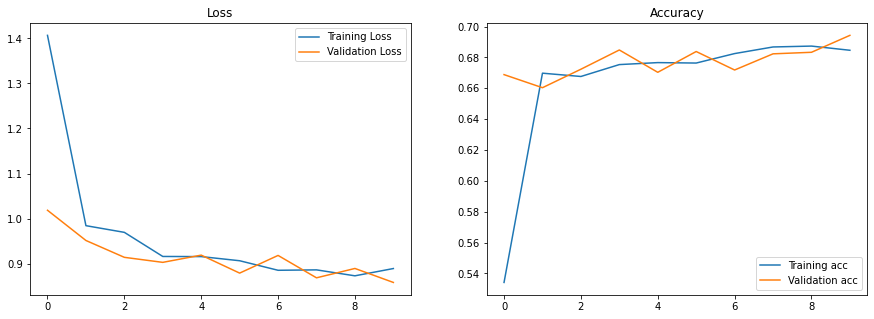

In [ ]:
# plot loss during training
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.title('Loss')
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
# plot accuracy during training
plt.subplot(122)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='Training acc')
plt.plot(history.history['val_accuracy'], label='Validation acc')
plt.legend()
# plt.title('Training vs Validation acc')
plt.show()

## Evaluation Metrics- For existing model
[7]
* Derma


In [ ]:
y_probs_derma_exs = model.predict(X_test_derma, verbose=0)
# predict crisp classes for test set
y_classes_derma_exs = np.argmax(model.predict(X_test_derma),axis=1)

# reduce to 1d array
y_probs_derma_exs = y_probs_derma_exs[:, 0]
rounded_labels=np.argmax(y_test_derma, axis=1)

In [ ]:
# accuracy: (tp + tn) / (p + n)
accuracy_derma_exs = accuracy_score(rounded_labels, y_classes_derma_exs)
print('Accuracy: %f' % accuracy_derma_exs)
# precision tp / (tp + fp)
precision_derma_exs = precision_score(rounded_labels, y_classes_derma_exs,pos_label='positive', average='micro')
print('Precision: %f' % precision_derma_exs)
# recall: tp / (tp + fn)
recall_derma_exs = recall_score(rounded_labels, y_classes_derma_exs,pos_label='positive', average='weighted')
print('Recall: %f' % recall_derma_exs)
# f1: 2 tp / (2 tp + fp + fn)
f1_derma_exs = f1_score(rounded_labels, y_classes_derma_exs,pos_label='positive', average='weighted')
print('F1 score: %f' % f1_derma_exs)
print('Confusion Matrix: \n', confusion_matrix(rounded_labels, y_classes_derma_exs))
print('\nClassification Report: \n',classification_report(rounded_labels, y_classes_derma_exs))

Accuracy: 0.694264
Precision: 0.694264
Recall: 0.694264
F1 score: 0.622925
Confusion Matrix: 
 [[   0    5   14    0    1   46    0]
 [   0   11   16    0    1   75    0]
 [   0    7   79    0    9  125    0]
 [   0    2    5    0    0   16    0]
 [   0    1   30    0   18  174    0]
 [   0    6   33    0   18 1284    0]
 [   0    0    3    0    0   26    0]]

Classification Report: 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        66
           1       0.34      0.11      0.16       103
           2       0.44      0.36      0.39       220
           3       0.00      0.00      0.00        23
           4       0.38      0.08      0.13       223
           5       0.74      0.96      0.83      1341
           6       0.00      0.00      0.00        29

    accuracy                           0.69      2005
   macro avg       0.27      0.21      0.22      2005
weighted avg       0.60      0.69      0.62      2005



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted sampl

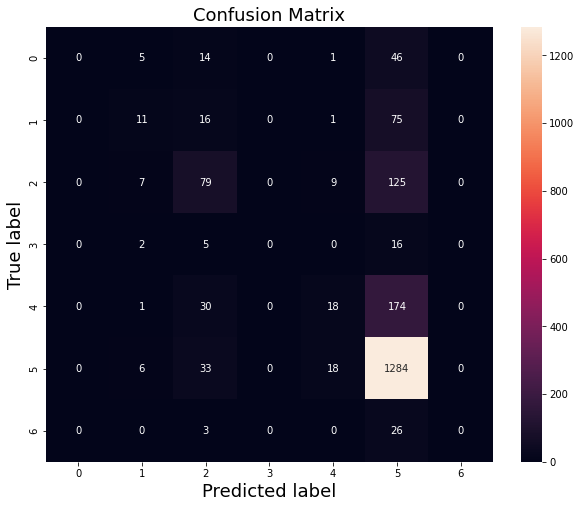

In [ ]:
# Plotting Confusion Matrix
cm =confusion_matrix(rounded_labels, y_classes_derma_exs)
plt.figure(figsize = (10,8))
sn.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix', fontsize=18)
plt.xlabel('Predicted label', fontsize=18)
plt.ylabel('True label', fontsize=18)
plt.show()

## Novel Model

In [ ]:
import tensorflow as tf

def create_cnn():
  # Declare a sequential model
  model = Sequential()

  # Conv Block 1
  # 64 filters and a network of 3X3
  model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu', input_shape=(28, 28, 3)))
  model.add(layers.Conv2D(64, (3, 3), activation='relu'))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(Dropout(0.25))
  # model.add(BatchNormalization(axis=-1))

  # Conv Block 2
  # 128 filters and a network of 3X3
  model.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
  model.add(layers.Conv2D(128, (3, 3), activation='relu'))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(Dropout(0.25))

  # Conv Block 3
  # 256 filters and a network of 3X3
  model.add(layers.Conv2D(256, (3, 3), padding='same', activation='relu'))
  model.add(layers.Conv2D(256, (3, 3), activation='relu'))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(Dropout(0.25))
  model.add(BatchNormalization(axis=-1))

  # Classifier
  # change it to 2D array with 7 dense
  model.add(layers.Flatten())
  model.add(layers.Dense(128, activation="relu"))
  model.add(Dropout(0.25))
  model.add(layers.Dense(7, activation="softmax"))

  return model

model = create_cnn()
# optimizer = "adam","rmsprop","sgd": but there is no differences between the results
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy','top_k_categorical_accuracy'])# Number of top elements to look at for computing accuracy. Defaults to 5.

#Fit model on training data
history = model.fit(X_train_derma, y_train_derma,validation_data=(X_test_derma,y_test_derma),
          batch_size=200,
          epochs=20,
          verbose=1)

# Evaluate model on test data
score_derma_cnn = model.evaluate(X_test_derma, y_test_derma, verbose=0, batch_size=128)
print('Test loss:', score_derma_cnn[0])
print('Test accuracy:', score_derma_cnn[1])
print('Test val_top_k_accuracy:', score_derma_cnn[2])
print('The error is: %.2f%%'%(100-score_derma_cnn[1]*100))

Epoch 1/20
36/36 [==============================] - 2s 29ms/step - loss: 1.1197 - accuracy: 0.6184 - top_k_categorical_accuracy: 0.9538 - val_loss: 1.1928 - val_accuracy: 0.6673 - val_top_k_categorical_accuracy: 0.9551
Epoch 2/20
36/36 [==============================] - 1s 21ms/step - loss: 0.9243 - accuracy: 0.6759 - top_k_categorical_accuracy: 0.9746 - val_loss: 1.4453 - val_accuracy: 0.6688 - val_top_k_categorical_accuracy: 0.9466
Epoch 3/20
36/36 [==============================] - 1s 21ms/step - loss: 0.8934 - accuracy: 0.6856 - top_k_categorical_accuracy: 0.9767 - val_loss: 1.2877 - val_accuracy: 0.6713 - val_top_k_categorical_accuracy: 0.9686
Epoch 4/20
36/36 [==============================] - 1s 21ms/step - loss: 0.8743 - accuracy: 0.6855 - top_k_categorical_accuracy: 0.9789 - val_loss: 0.9576 - val_accuracy: 0.6683 - val_top_k_categorical_accuracy: 0.9681
Epoch 5/20
36/36 [==============================] - 1s 21ms/step - loss: 0.8355 - accuracy: 0.6984 - top_k_categorical_accur

## Saving and Loading the Model

In [ ]:
# Save the model
model.save('cnn_derma_novel.h5')

In [ ]:
# load the model again
model = keras.models.load_model('cnn_derma_novel.h5')

## Plotting the Loss and Accuracy

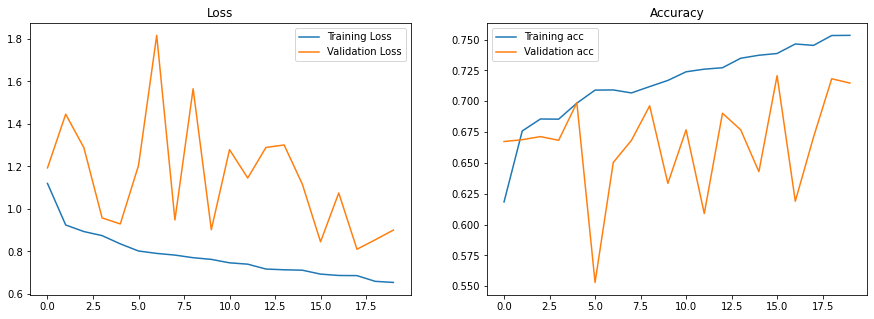

In [ ]:
# plot loss during training
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.title('Loss')
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
# plot accuracy during training
plt.subplot(122)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='Training acc')
plt.plot(history.history['val_accuracy'], label='Validation acc')
plt.legend()
# plt.title('Training vs Validation acc')
plt.show()

## Evaluation Metrics- For imbalanced dataset
* Derma



In [ ]:
y_probs_derma = model.predict(X_test_derma, verbose=0)
# predict crisp classes for test set
y_classes_derma = np.argmax(model.predict(X_test_derma),axis=1)

# reduce to 1d array
y_probs_derma = y_probs_derma[:, 0]
rounded_labels=np.argmax(y_test_derma, axis=1)

In [ ]:
# accuracy: (tp + tn) / (p + n)
accuracy_derma_cnn = accuracy_score(rounded_labels, y_classes_derma)
print('Accuracy: %f' % accuracy_derma_cnn)
# precision tp / (tp + fp)
precision_derma_cnn = precision_score(rounded_labels, y_classes_derma,pos_label='positive', average='micro')
print('Precision: %f' % precision_derma_cnn)
# recall: tp / (tp + fn)
recall_derma_cnn = recall_score(rounded_labels, y_classes_derma,pos_label='positive', average='weighted')
print('Recall: %f' % recall_derma_cnn)
# f1: 2 tp / (2 tp + fp + fn)
f1_derma_cnn = f1_score(rounded_labels, y_classes_derma,pos_label='positive', average='weighted')
print('F1 score: %f' % f1_derma_cnn)
print('Confusion Matrix: \n', confusion_matrix(rounded_labels, y_classes_derma))
print('\nClassification Report: \n',classification_report(rounded_labels, y_classes_derma))

Accuracy: 0.714713
Precision: 0.714713
Recall: 0.714713
F1 score: 0.676755
Confusion Matrix: 
 [[   0   19   15    0   14   17    1]
 [   0   32   22    0    4   44    1]
 [   0    9   69    0   20  122    0]
 [   0   12    2    0    1    8    0]
 [   0    3   14    0   68  138    0]
 [   0   18   14    0   55 1253    1]
 [   0    3    2    0    4    9   11]]

Classification Report: 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        66
           1       0.33      0.31      0.32       103
           2       0.50      0.31      0.39       220
           3       0.00      0.00      0.00        23
           4       0.41      0.30      0.35       223
           5       0.79      0.93      0.85      1341
           6       0.79      0.38      0.51        29

    accuracy                           0.71      2005
   macro avg       0.40      0.32      0.35      2005
weighted avg       0.66      0.71      0.68      2005



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted sampl

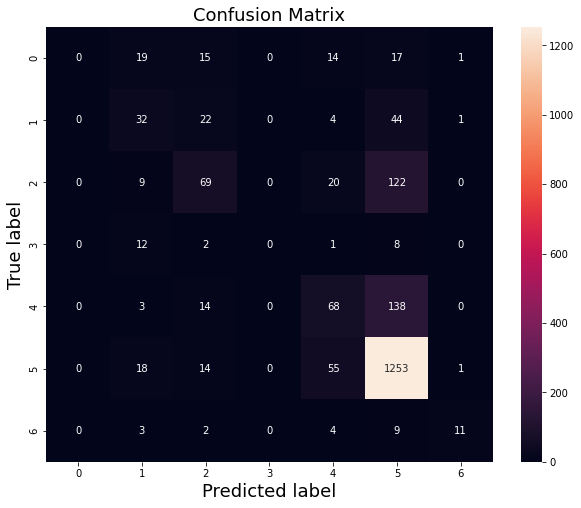

In [ ]:
# Plotting Confusion Matrix
cm =confusion_matrix(rounded_labels, y_classes_derma)
plt.figure(figsize = (10,8))
sn.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix', fontsize=18)
plt.xlabel('Predicted label', fontsize=18)
plt.ylabel('True label', fontsize=18)
plt.show()

In [ ]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 28, 28, 64)        1792      
                                                                 
 conv2d_31 (Conv2D)          (None, 26, 26, 64)        36928     
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 13, 13, 64)       0         
 g2D)                                                            
                                                                 
 dropout_30 (Dropout)        (None, 13, 13, 64)        0         
                                                                 
 conv2d_32 (Conv2D)          (None, 13, 13, 128)       73856     
                                                                 
 conv2d_33 (Conv2D)          (None, 11, 11, 128)       147584    
                                                     

## Evaluation metrics- For balanced data

In [ ]:
history = model.fit(X_train_derma, y_train_derma,validation_data=(X_val_derma,y_val_derma),
          batch_size=1000,
          epochs=10,
          verbose=1,
          class_weight=W1) # we add weights here
# Evaluate model on test data

score_derma_cnn_balanced = model.evaluate(X_test_derma, y_test_derma, verbose=0, batch_size=128)
print('Test loss:', score_derma_cnn_balanced[0])
print('Test accuracy:', score_derma_cnn_balanced[1])
print('Test val_top_k_accuracy:', score_derma_cnn_balanced[2])
print('The error is: %.2f%%'%(100-score_derma_cnn_balanced[1]*100))
####################################################
y_probs_derma_cnn_balanced = model.predict(X_test_derma, verbose=0)
# predict crisp classes for test set
y_classes_derma_cnn_balanced = np.argmax(model.predict(X_test_derma),axis=1)

# reduce to 1d array
y_probs_derma_cnn_balanced = y_probs_derma_cnn_balanced[:, 0]
rounded_labels=np.argmax(y_test_derma, axis=1)
###################################################
# accuracy: (tp + tn) / (p + n)
accuracy_derma_cnn_balanced = accuracy_score(rounded_labels, y_classes_derma_cnn_balanced)
print('Accuracy: %f' % accuracy_derma_cnn_balanced)
# precision tp / (tp + fp)
precision_derma_cnn_balanced = precision_score(rounded_labels, y_classes_derma_cnn_balanced,pos_label='positive', average='micro')
print('Precision: %f' % precision_derma_cnn_balanced)
# recall: tp / (tp + fn)
recall_derma_cnn_balanced = recall_score(rounded_labels, y_classes_derma_cnn_balanced,pos_label='positive', average='weighted')
print('Recall: %f' % recall_derma_cnn_balanced)
# f1: 2 tp / (2 tp + fp + fn)
f1_derma_cnn_balanced = f1_score(rounded_labels, y_classes_derma_cnn_balanced,pos_label='positive', average='weighted')
print('F1 score: %f' % f1_derma_cnn_balanced)
print('Confusion Matrix: \n', confusion_matrix(rounded_labels, y_classes_derma_cnn_balanced))
print('\nClassification Report: \n',classification_report(rounded_labels, y_classes_derma_cnn_balanced))

Epoch 1/10
8/8 [==============================] - 1s 106ms/step - loss: 0.7302 - accuracy: 0.7647 - top_k_categorical_accuracy: 0.9933 - val_loss: 30.5910 - val_accuracy: 0.6690 - val_top_k_categorical_accuracy: 0.9960
Epoch 2/10
8/8 [==============================] - 1s 71ms/step - loss: 0.7329 - accuracy: 0.7524 - top_k_categorical_accuracy: 0.9929 - val_loss: 7.6804 - val_accuracy: 0.6710 - val_top_k_categorical_accuracy: 0.9541
Epoch 3/10
8/8 [==============================] - 1s 72ms/step - loss: 0.7340 - accuracy: 0.7597 - top_k_categorical_accuracy: 0.9913 - val_loss: 4.2700 - val_accuracy: 0.6630 - val_top_k_categorical_accuracy: 0.9442
Epoch 4/10
8/8 [==============================] - 1s 71ms/step - loss: 0.7098 - accuracy: 0.7618 - top_k_categorical_accuracy: 0.9937 - val_loss: 8.1664 - val_accuracy: 0.6700 - val_top_k_categorical_accuracy: 0.9123
Epoch 5/10
8/8 [==============================] - 1s 71ms/step - loss: 0.6952 - accuracy: 0.7735 - top_k_categorical_accuracy: 0.9

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,


In [ ]:
# Save the model
model.save('cnn_derma_novel_balanced.h5')

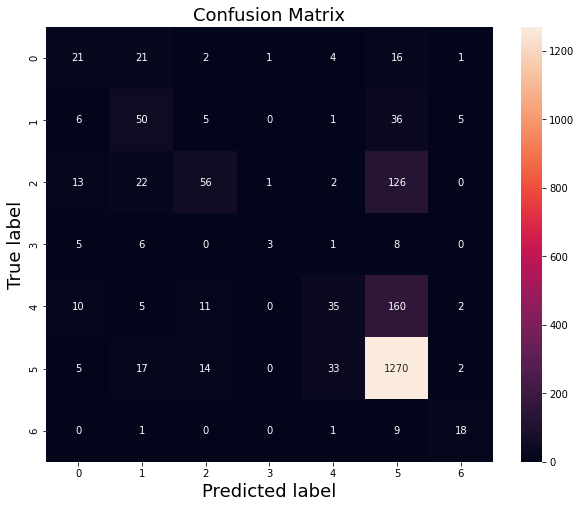

In [ ]:
# Plotting Confusion Matrix
cm =confusion_matrix(rounded_labels, y_classes_derma_cnn_balanced)
plt.figure(figsize = (10,8))
sn.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix', fontsize=18)
plt.xlabel('Predicted label', fontsize=18)
plt.ylabel('True label', fontsize=18)
plt.show()

##Data Augmentation
[8]
* Derma

In [ ]:
# X_train_derma = X_train_derma.reshape(7007, 28,28,3)

In [ ]:
model = create_cnn()
model.compile(optimizer="adam",loss='categorical_crossentropy',
              metrics=['accuracy'])
epochs=20
batch_size = 256
data_augmentation = True

if not data_augmentation:
  print("Training without augmentation.")
  model.fit(X_train_derma,y_train_derma, batch_size = batch_size,
            epochs = epochs,
            validation_data = (X_test_derma, y_test_derma),
            shuffle = True)

else:
  print("Training using real_time data augmentation.")
  datagen = ImageDataGenerator(
      featurewise_center = False,
      samplewise_center = False,
      featurewise_std_normalization = False,
      samplewise_std_normalization = False,
      zca_whitening = False,
      rotation_range = 0,
      width_shift_range = 0.1,
      height_shift_range = 0.1,
      horizontal_flip = True,
      vertical_flip = False)
  
  datagen.fit(X_train_derma)
  model.fit_generator(datagen.flow(X_train_derma,y_train_derma),
                      epochs = epochs,
                      validation_data = (X_test_derma, y_test_derma))


Training using real_time data augmentation.
Epoch 1/20


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


219/219 [==============================] - 5s 17ms/step - loss: 1.0461 - accuracy: 0.6404 - val_loss: 0.9327 - val_accuracy: 0.6688
Epoch 2/20
219/219 [==============================] - 4s 17ms/step - loss: 0.9320 - accuracy: 0.6628 - val_loss: 1.1473 - val_accuracy: 0.6693
Epoch 3/20
219/219 [==============================] - 4s 16ms/step - loss: 0.9021 - accuracy: 0.6712 - val_loss: 0.9550 - val_accuracy: 0.6090
Epoch 4/20
219/219 [==============================] - 3s 16ms/step - loss: 0.8984 - accuracy: 0.6723 - val_loss: 0.8783 - val_accuracy: 0.6813
Epoch 5/20
219/219 [==============================] - 4s 16ms/step - loss: 0.8913 - accuracy: 0.6812 - val_loss: 0.8632 - val_accuracy: 0.6848
Epoch 6/20
219/219 [==============================] - 4s 17ms/step - loss: 0.8697 - accuracy: 0.6823 - val_loss: 0.8453 - val_accuracy: 0.6903
Epoch 7/20
219/219 [==============================] - 4s 16ms/step - loss: 0.8569 - accuracy: 0.6927 - val_loss: 0.8171 - val_accuracy: 0.6988
Epoch 8/20

In [ ]:
model.save('cnn_derma_aug.h5')

## Evaluation Metrics after Data Augmentation
* Derma

In [ ]:
score_derma_aug = model.evaluate(X_test_derma, y_test_derma, batch_size = 250)

9/9 [==============================] - 0s 8ms/step - loss: 0.8011 - accuracy: 0.7007


In [ ]:
yaug_probs_derma = model.predict(X_test_derma, verbose=0)
# predict crisp classes for test set
yaug_classes_derma = np.argmax(model.predict(X_test_derma),axis=1)

# reduce to 1d array
yaug_probs_derma = yaug_probs_derma[:, 0]
rounded_labels=np.argmax(y_test_derma, axis=1)

In [ ]:
# accuracy: (tp + tn) / (p + n)
accuracy_derma_aug = accuracy_score(rounded_labels, yaug_classes_derma)
print('Accuracy: %f' % accuracy_derma_aug)
# precision tp / (tp + fp)
precision_derma_aug = precision_score(rounded_labels, yaug_classes_derma,pos_label='positive', average='micro')
print('Precision: %f' % precision_derma_aug)
# recall: tp / (tp + fn)
recall_derma_aug = recall_score(rounded_labels, yaug_classes_derma,pos_label='positive', average='weighted')
print('Recall: %f' % recall_derma_aug)
# f1: 2 tp / (2 tp + fp + fn)
f1_derma_aug = f1_score(rounded_labels, yaug_classes_derma,pos_label='positive', average='weighted')
print('F1 score: %f' % f1_derma_aug)
print('Confusion Matrix: \n', confusion_matrix(rounded_labels, yaug_classes_derma))
print('\nClassification Report: \n',classification_report(rounded_labels, yaug_classes_derma))

Accuracy: 0.700748
Precision: 0.700748
Recall: 0.700748
F1 score: 0.646712
Confusion Matrix: 
 [[   0   24   22    0    0   18    2]
 [   0   40   20    0    0   34    9]
 [   0   24  104    0    0   91    1]
 [   0    5    6    0    0   11    1]
 [   0    5   51    0    4  160    3]
 [   0   17   76    0    4 1242    2]
 [   0    4    1    0    0    9   15]]

Classification Report: 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        66
           1       0.34      0.39      0.36       103
           2       0.37      0.47      0.42       220
           3       0.00      0.00      0.00        23
           4       0.50      0.02      0.03       223
           5       0.79      0.93      0.85      1341
           6       0.45      0.52      0.48        29

    accuracy                           0.70      2005
   macro avg       0.35      0.33      0.31      2005
weighted avg       0.65      0.70      0.65      2005



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted sampl

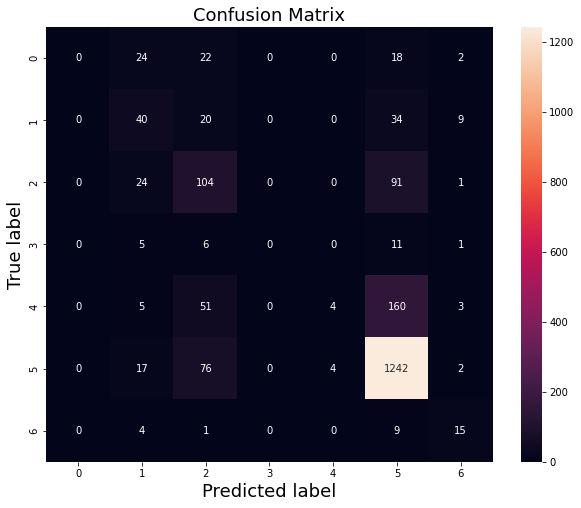

In [ ]:
# Plotting Confusion Matrix
cm =confusion_matrix(rounded_labels, yaug_classes_derma)
plt.figure(figsize = (10,8))
sn.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix', fontsize=18)
plt.xlabel('Predicted label', fontsize=18)
plt.ylabel('True label', fontsize=18)
plt.show()

## Predicting class for new images
* Derma(using CNN)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input dat

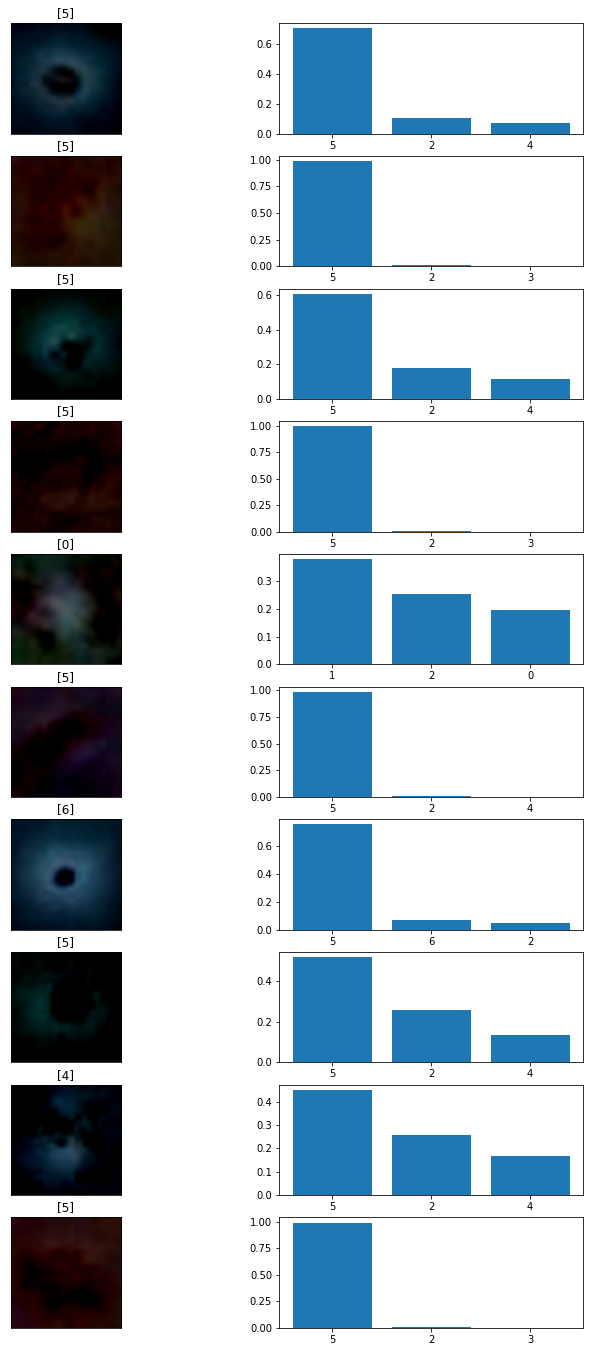

In [ ]:
plt.figure(figsize=(12, 24))
idx = np.random.choice(len(X_test_derma), 10, replace= False)

p = model.predict(X_test_derma[idx])

for i in range(len(idx)):
  plt.subplot(10,2,2*i+1)
  plt.imshow(X_test_derma[idx[i]], interpolation="spline16")
  plt.title(np.unique(dermaMNIST_data['test_labels'][idx[i]]))
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  pred_label = np.argsort(-p[i])[:3]
  pred_prob = [p[i][l] for l in pred_label]
  pred_label = [np.unique(dermaMNIST_data['test_labels'])[l] for l in pred_label]
  
  plt.subplot(10, 2, 2*i+2)
  plt.bar(range(3), pred_prob)
  plt.xticks(range(3), pred_label)

plt.show()
                          
                          
                          

## Plotting the Loss and Accuracy

* Derma(using CNN)

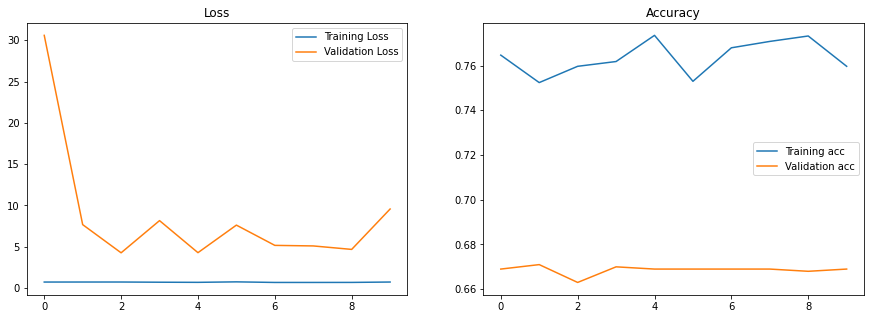

In [ ]:
# plot loss during training
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.title('Loss')
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
# plot accuracy during training
plt.subplot(122)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='Training acc')
plt.plot(history.history['val_accuracy'], label='Validation acc')
plt.legend()
plt.show()

## Inspecting the output

It's always a good idea to inspect the output and make sure everything looks good. Here we'll look at some examples it gets right, and some examples it gets wrong.[9]




* Derma(using CNN)

In [ ]:
# select 25 random images from the test images
idx = np.random.choice(X_test_derma.shape[0],25, replace= False)

# predict class for selected images
y_pred_derma = np.argmax(model.predict(X_test_derma[idx]), axis=-1)

# True class for selected images
y_true_derma = y_test_derma[idx].argmax(axis=1)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

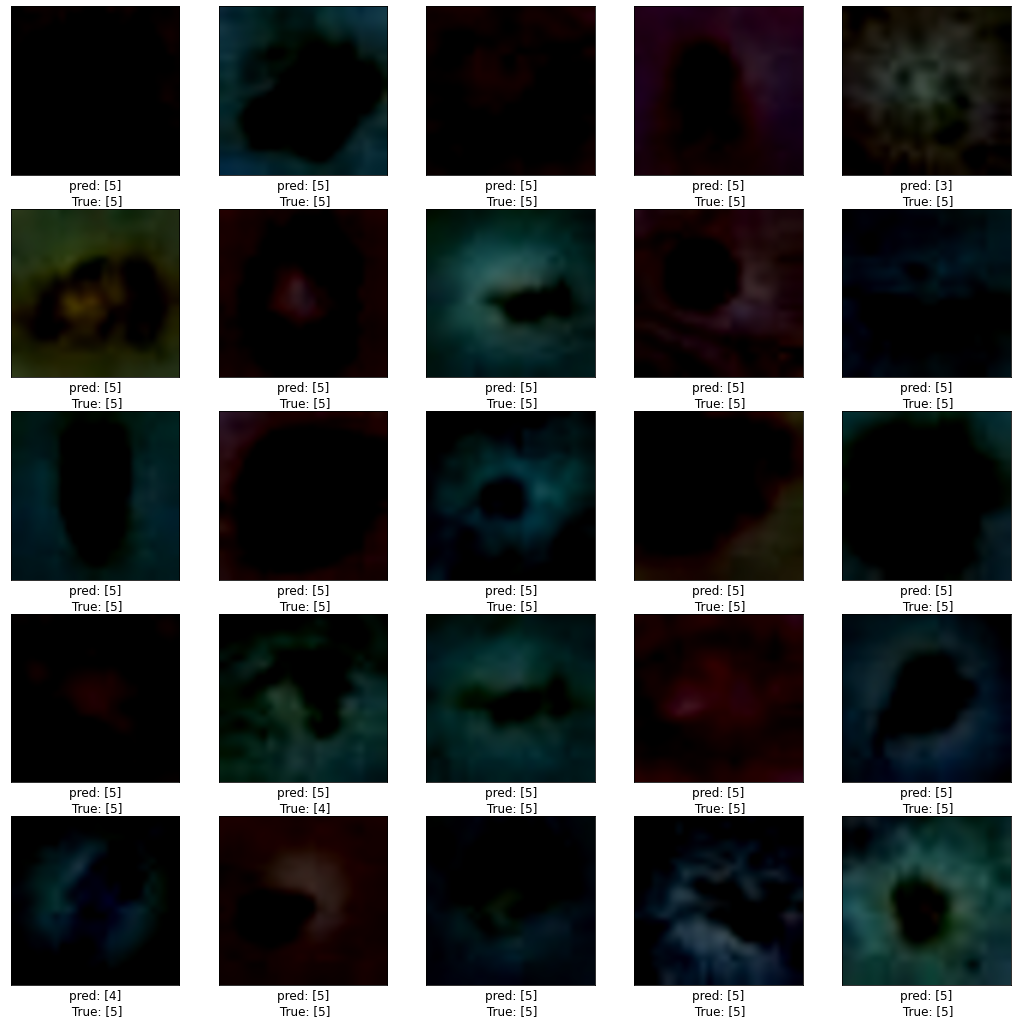

In [ ]:
fig, axes = plt.subplots(5, 5, figsize=(18, 18))
for i , ax in enumerate(axes.flat):
  ax.imshow(X_test_derma[idx[i]].reshape(28,28,3), interpolation='spline16')
  pred_class = np.unique(dermaMNIST_data['test_labels'][y_pred_derma[i]])
  true_class = np.unique(dermaMNIST_data['test_labels'][y_true_derma[i]])
  ax.set_xlabel('pred: {}\n True: {}'.format(pred_class, true_class), fontsize=12)
  ax.set_xticks([])
  ax.set_yticks([])

# **Define the Second Model for DermaMNIST**


## MLP
* Derma

In [ ]:
# For CNN we need 4D array, while for DNN we need 2D array
# Pre-Processing for Derma dataset
X_train_derma = X_train_derma.reshape(7007, 2352)
X_test_derma = X_test_derma.reshape(2005, 2352)
X_val_derma = X_val_derma.reshape(1003, 2352)

X_train_derma = X_train_derma.astype('float32')
X_test_derma = X_test_derma.astype('float32')
X_val_derma= X_val_derma.astype('float32')

mu = np.mean(X_train_derma, axis=0)
X_train_derma -= mu
X_test_derma -= mu

X_train_derma /= 255
X_test_derma /= 255
X_val_derma /= 255

#################################################
print("Matrices of DermaMNIST :")
print("Training matrix shape", X_train_derma.shape)
print("Testing matrix shape", X_test_derma.shape)
print("Val matrix shape", X_val_derma.shape)


Matrices of DermaMNIST :
Training matrix shape (7007, 2352)
Testing matrix shape (2005, 2352)
Val matrix shape (1003, 2352)


In [ ]:
# network parameters
batch_size = 128
hidden_units = 300
dropout = 0.5

model = Sequential()

# first hidden layer
model.add(Dense(hidden_units, input_dim=2352))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(dropout))
# second hidden layer
model.add(Dense(hidden_units))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(dropout))
# third hidden layer
model.add(Dense(hidden_units))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(dropout))
# forth hidden layer
model.add(Dense(hidden_units))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(dropout))

model.add(Dense(7))
model.add(Activation('softmax'))

In [ ]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_32 (Dense)            (None, 300)               705900    
                                                                 
 batch_normalization_14 (Bat  (None, 300)              1200      
 chNormalization)                                                
                                                                 
 activation_17 (Activation)  (None, 300)               0         
                                                                 
 dropout_38 (Dropout)        (None, 300)               0         
                                                                 
 dense_33 (Dense)            (None, 300)               90300     
                                                                 
 batch_normalization_15 (Bat  (None, 300)              1200      
 chNormalization)                                    

In [ ]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(X_train_derma, y_train_derma,epochs=15, batch_size=batch_size,validation_data=(X_test_derma,y_test_derma))
loss_derma_mlp, acc_derma_mlp = model.evaluate(X_test_derma, y_test_derma, batch_size=batch_size)
print("\nTest accuracy: %.1f%%" % (100.0 * acc_derma_mlp))
print("\nTest loss: %.1f%%" % (loss_derma_mlp))

Epoch 1/15
55/55 [==============================] - 2s 11ms/step - loss: 1.4290 - accuracy: 0.5345 - val_loss: 1.5065 - val_accuracy: 0.6688
Epoch 2/15
55/55 [==============================] - 0s 7ms/step - loss: 1.0610 - accuracy: 0.6406 - val_loss: 1.4030 - val_accuracy: 0.6688
Epoch 3/15
55/55 [==============================] - 0s 7ms/step - loss: 0.9945 - accuracy: 0.6539 - val_loss: 1.3624 - val_accuracy: 0.6688
Epoch 4/15
55/55 [==============================] - 0s 6ms/step - loss: 0.9603 - accuracy: 0.6588 - val_loss: 1.3987 - val_accuracy: 0.6688
Epoch 5/15
55/55 [==============================] - 0s 6ms/step - loss: 0.9263 - accuracy: 0.6729 - val_loss: 1.3592 - val_accuracy: 0.6688
Epoch 6/15
55/55 [==============================] - 0s 6ms/step - loss: 0.9200 - accuracy: 0.6709 - val_loss: 1.3367 - val_accuracy: 0.6673
Epoch 7/15
55/55 [==============================] - 0s 7ms/step - loss: 0.8993 - accuracy: 0.6810 - val_loss: 1.3368 - val_accuracy: 0.6723
Epoch 8/15
55/55 [=

In [ ]:
# Save the model
model.save('cnn_derma_mlp.h5')

## Evaluation Metrics 
* Derma

In [ ]:
y_probs_derma_mlp = model.predict(X_test_derma, verbose=0)
# predict crisp classes for test set
y_classes_derma_mlp = np.argmax(model.predict(X_test_derma),axis=1)

# reduce to 1d array
y_probs_derma_mlp = y_probs_derma_mlp[:, 0]
rounded_labels=np.argmax(y_test_derma, axis=1)

In [ ]:
# accuracy: (tp + tn) / (p + n)
accuracy_derma_mlp = accuracy_score(rounded_labels, y_classes_derma_mlp)
print('Accuracy: %f' % accuracy_derma_mlp)
# precision tp / (tp + fp)
precision_derma_mlp = precision_score(rounded_labels, y_classes_derma_mlp,pos_label='positive', average='micro')
print('Precision: %f' % precision_derma_mlp)
# recall: tp / (tp + fn)
recall_derma_mlp = recall_score(rounded_labels, y_classes_derma_mlp,pos_label='positive', average='weighted')
print('Recall: %f' % recall_derma_mlp)
# f1: 2 tp / (2 tp + fp + fn)
f1_derma_mlp = f1_score(rounded_labels, y_classes_derma_mlp,pos_label='positive', average='weighted')
print('F1 score: %f' % f1_derma_mlp)
print('Confusion Matrix: \n', confusion_matrix(rounded_labels, y_classes_derma_mlp))
print('\nClassification Report: \n',classification_report(rounded_labels, y_classes_derma_mlp))

Accuracy: 0.692269
Precision: 0.692269
Recall: 0.692269
F1 score: 0.637825
Confusion Matrix: 
 [[   7   43    6    0    0   10    0]
 [   2   71   10    0    0   20    0]
 [   6   29   74    0    1  110    0]
 [   2   14    3    0    0    4    0]
 [   3    9   34    0    1  176    0]
 [   6   66   31    0    3 1235    0]
 [   1   14    4    0    0   10    0]]

Classification Report: 
               precision    recall  f1-score   support

           0       0.26      0.11      0.15        66
           1       0.29      0.69      0.41       103
           2       0.46      0.34      0.39       220
           3       0.00      0.00      0.00        23
           4       0.20      0.00      0.01       223
           5       0.79      0.92      0.85      1341
           6       0.00      0.00      0.00        29

    accuracy                           0.69      2005
   macro avg       0.28      0.29      0.26      2005
weighted avg       0.62      0.69      0.64      2005



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted sampl

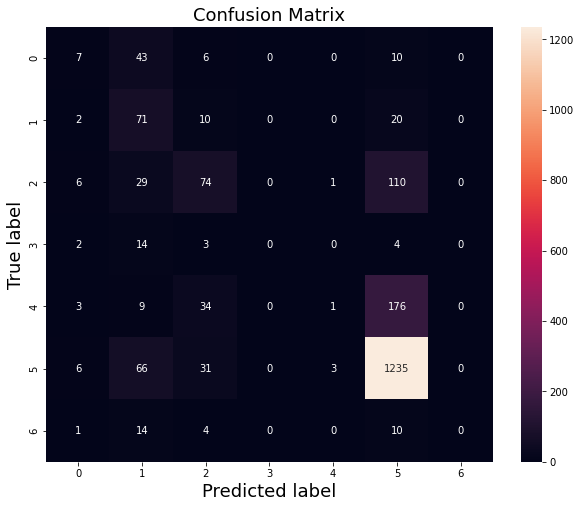

In [ ]:
# Plotting Confusion Matrix
cm =confusion_matrix(rounded_labels, y_classes_derma_mlp)
plt.figure(figsize = (10,8))
sn.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix', fontsize=18)
plt.xlabel('Predicted label', fontsize=18)
plt.ylabel('True label', fontsize=18)
plt.show()

##Plotting the Loss and Accuracy
* Derma(using MLP)

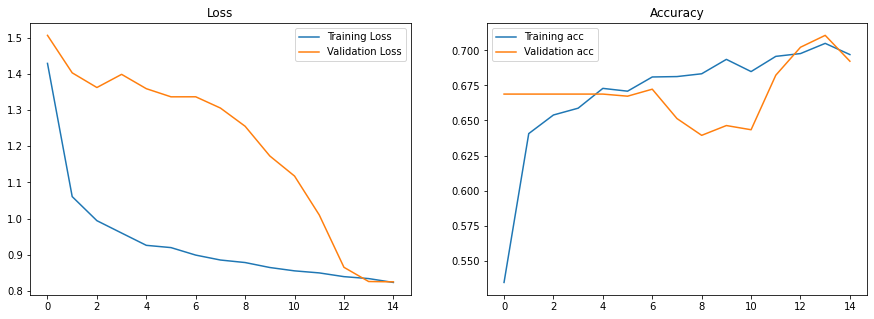

In [ ]:
# plot loss during training
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.title('Loss')
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
# plot accuracy during training
plt.subplot(122)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='Training acc')
plt.plot(history.history['val_accuracy'], label='Validation acc')
plt.legend()
# plt.title('Training vs Validation acc')
plt.show()

## Applying over-sampling to CNN
* Derma

In [ ]:
print("Shape of Derma Dataset: ")
print("The shape of train images is : ",  x_train_ros_derma.shape)
print("The shape of val images is   : ",    x_val_ros_derma.shape)
print("The shape of test images is  : ",   x_test_ros_derma.shape)
print("The shape of train labels is : ",  y_train_ros_derma.shape)
print("The shape of val labels is   : ",    y_val_ros_derma.shape)
print("The shape of test labels is  : ",   y_test_ros_derma.shape)
################################################################################
# print("\nShape of Retina Dataset: ")
# print("The shape of train images is : ",  retinaMNIST_data['train_images'].shape)
# print("The shape of val images is   : ",    retinaMNIST_data['val_images'].shape)
# print("The shape of test images is  : ",   retinaMNIST_data['test_images'].shape)
# print("The shape of train labels is : ",  retinaMNIST_data['train_labels'].shape)
# print("The shape of val labels is   : ",    retinaMNIST_data['val_labels'].shape)
# print("The shape of test labels is  : ",   retinaMNIST_data['test_labels'].shape)

Shape of Derma Dataset: 
The shape of train images is :  (32851, 2352)
The shape of val images is   :  (4697, 2352)
The shape of test images is  :  (9387, 2352)
The shape of train labels is :  (32851,)
The shape of val labels is   :  (4697,)
The shape of test labels is  :  (9387,)


In [ ]:
# Pre-Processing for Derma dataset
x_train_ros_derma = x_train_ros_derma.reshape(32851, 2352)
# x_test_ros_derma = x_test_ros_derma.reshape(4697, 28,28,3)
# x_val_ros_derma = x_val_ros_derma.reshape(9387, 28,28,3)

x_train_ros_derma = x_train_ros_derma.astype('float32')
x_test_ros_derma = x_test_ros_derma.astype('float32')
x_val_ros_derma= x_val_ros_derma.astype('float32')

x_train_ros_derma /= 255
x_test_ros_derma /= 255
x_val_ros_derma /= 255
#################################################
print("Matrices of DermaMNIST :")
print("Training matrix shape", x_train_ros_derma.shape)
print("Testing matrix shape", x_test_ros_derma.shape)
print("Val matrix shape", x_val_ros_derma.shape)


Matrices of DermaMNIST :
Training matrix shape (32851, 2352)
Testing matrix shape (9387, 2352)
Val matrix shape (4697, 2352)


In [ ]:
#The y_train and y_test data are now split into 7 distinct class labels
# Derma Dataset
y_train_ros_derma = np_utils.to_categorical(y_train_ros_derma,7)
y_test_ros_derma = np_utils.to_categorical(y_test_ros_derma,7)
y_val_ros_derma = np_utils.to_categorical(y_val_ros_derma,7)
print("The shape of train labels",y_train_ros_derma.shape)
print("The shape of test labels",y_test_ros_derma.shape)
print("The shape of val labels",y_val_ros_derma.shape)

The shape of train labels (32851, 7)
The shape of test labels (9387, 7)
The shape of val labels (4697, 7)


In [ ]:
# network parameters
batch_size = 128
hidden_units = 100
dropout = 0.2

model = Sequential()

# first hidden layer
model.add(Dense(hidden_units, input_dim=2352))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(dropout))
# second hidden layer
model.add(Dense(hidden_units))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(dropout))
# third hidden layer
model.add(Dense(hidden_units))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(dropout))
# forth hidden layer
model.add(Dense(hidden_units))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(dropout))

model.add(Dense(7))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(x_train_ros_derma, y_train_ros_derma,epochs=15, batch_size=batch_size,validation_data=(x_val_ros_derma,y_val_ros_derma))
loss_ros, acc_ros = model.evaluate(x_test_ros_derma, y_test_ros_derma, batch_size=batch_size)
print("\nTest accuracy: %.1f%%" % (100.0 * acc_ros))
print("\nTest loss: %.1f%%" % (loss_ros))

Epoch 1/15
257/257 [==============================] - 4s 7ms/step - loss: 1.4543 - accuracy: 0.4458 - val_loss: 2.3991 - val_accuracy: 0.2423
Epoch 2/15
257/257 [==============================] - 1s 6ms/step - loss: 1.0099 - accuracy: 0.6286 - val_loss: 4.5256 - val_accuracy: 0.2267
Epoch 3/15
257/257 [==============================] - 1s 6ms/step - loss: 0.8215 - accuracy: 0.6969 - val_loss: 4.3750 - val_accuracy: 0.2350
Epoch 4/15
257/257 [==============================] - 1s 6ms/step - loss: 0.6990 - accuracy: 0.7420 - val_loss: 2.8684 - val_accuracy: 0.2338
Epoch 5/15
257/257 [==============================] - 1s 6ms/step - loss: 0.6189 - accuracy: 0.7696 - val_loss: 6.4610 - val_accuracy: 0.2140
Epoch 6/15
257/257 [==============================] - 1s 6ms/step - loss: 0.5531 - accuracy: 0.7912 - val_loss: 5.5387 - val_accuracy: 0.2510
Epoch 7/15
257/257 [==============================] - 1s 6ms/step - loss: 0.5119 - accuracy: 0.8080 - val_loss: 5.4805 - val_accuracy: 0.2169
Epoch 

In [ ]:
model.save('cnn_derma_oversampling.h5')

## Evaluation Metrics-using over-sampling
* Derma

In [ ]:
y_probs_derma_mlp_ros = model.predict(x_test_ros_derma, verbose=0)
# predict crisp classes for test set
y_classes_derma_mlp_ros = np.argmax(model.predict(x_test_ros_derma),axis=1)

# reduce to 1d array
y_probs_derma_mlp_ros = y_probs_derma_mlp_ros[:, 0]
rounded_labels=np.argmax(y_test_ros_derma, axis=1)

In [ ]:
# accuracy: (tp + tn) / (p + n)
accuracy_derma_mlp_ros = accuracy_score(rounded_labels, y_classes_derma_mlp_ros)
print('Accuracy: %f' % accuracy_derma_mlp_ros)
# precision tp / (tp + fp)
precision_derma_mlp_ros = precision_score(rounded_labels, y_classes_derma_mlp_ros,pos_label='positive', average='micro')
print('Precision: %f' % precision_derma_mlp_ros)
# recall: tp / (tp + fn)
recall_derma_mlp_ros = recall_score(rounded_labels, y_classes_derma_mlp_ros,pos_label='positive', average='weighted')
print('Recall: %f' % recall_derma_mlp_ros)
# f1: 2 tp / (2 tp + fp + fn)
f1_derma_mlp_ros = f1_score(rounded_labels, y_classes_derma_mlp_ros,pos_label='positive', average='weighted')
print('F1 score: %f' % f1_derma_mlp_ros)
print('Confusion Matrix: \n', confusion_matrix(rounded_labels, y_classes_derma_mlp_ros))
print('\nClassification Report: \n',classification_report(rounded_labels, y_classes_derma_mlp_ros))

Accuracy: 0.323746
Precision: 0.323746
Recall: 0.323746
F1 score: 0.249320
Confusion Matrix: 
 [[  0   0 475   0 240 558  68]
 [  0  14 582  13 243 400  89]
 [  0   0 680   0 381 267  13]
 [  0   0 358   0   0 805 178]
 [  0   0 346   0 774 193  28]
 [  0   0 181   0 307 841  12]
 [  0   0 135   0 297 179 730]]

Classification Report: 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      1341
           1       1.00      0.01      0.02      1341
           2       0.25      0.51      0.33      1341
           3       0.00      0.00      0.00      1341
           4       0.35      0.58      0.43      1341
           5       0.26      0.63      0.37      1341
           6       0.65      0.54      0.59      1341

    accuracy                           0.32      9387
   macro avg       0.36      0.32      0.25      9387
weighted avg       0.36      0.32      0.25      9387



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted sampl

# **Define the First Model for RetinaMNIST**

##CNN
* Retina

In [ ]:
# For CNN we need 4D array, while for DNN we need 2D array
# Pre-Processing for Retina dataset
X_train_retina = X_train_retina.reshape(1080, 28,28,3)
X_test_retina = X_test_retina.reshape(400, 28,28,3)
X_val_retina = X_val_retina.reshape(120, 28,28,3)

X_train_retina = X_train_retina.astype('float32')
X_test_retina = X_test_retina.astype('float32')
X_val_retina= X_val_retina.astype('float32')

mu = np.mean(X_train_retina, axis=0)
X_train_retina -= mu
X_test_retina -= mu

X_train_retina /= 255
X_test_retina /= 255
X_val_retina /= 255
#################################################
print("\nMatrices of RetinaMNIST :")
print("Training matrix shape", X_train_retina.shape)
print("Testing matrix shape", X_test_retina.shape)
print("Val matrix shape", X_val_retina.shape)


Matrices of RetinaMNIST :
Training matrix shape (1080, 28, 28, 3)
Testing matrix shape (400, 28, 28, 3)
Val matrix shape (120, 28, 28, 3)


## Existing Model
[6]
* Retina

In [ ]:
# Declare a sequential model
model = Sequential()
# 32 filters and a network of 5X5
model.add(layers.Conv2D(32, (5, 5), activation='relu', input_shape=(28, 28, 3)))
model.add(layers.MaxPooling2D((2, 2)))
# 64 filters and a network of 5X5
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
# change it to 1D array with 5 dense
model.add(layers.Flatten())
model.add(layers.Dense(5, activation="softmax"))

# 'mse:Mean Squared Error', 'mae:Mean Absolute Error', 'mape:Mean Absolute Percentage Error', 'cosine:Cosine Proximity:'
# optimizer = "adam","rmsprop","sgd"
model.compile(optimizer='sgd',
              loss='mse',metrics=['mse'])

#Fit model on training data
history = model.fit(X_train_retina, y_train_retina,
          batch_size=100,
          epochs=50,
          verbose=1,validation_data=(X_test_retina,y_test_retina))
 
# # Evaluate model on test data
score_retina_exs = model.evaluate(X_test_retina, y_test_retina, verbose=0)
print('Test loss:', score_retina_exs[0])
print('Test MSE:', score_retina_exs[1])
print('The error is: %.2f%%'%(100-score_retina_exs[1]*100))

Epoch 1/50
11/11 [==============================] - 0s 17ms/step - loss: 0.1585 - mse: 0.1585 - val_loss: 0.1580 - val_mse: 0.1580
Epoch 2/50
11/11 [==============================] - 0s 6ms/step - loss: 0.1582 - mse: 0.1582 - val_loss: 0.1578 - val_mse: 0.1578
Epoch 3/50
11/11 [==============================] - 0s 6ms/step - loss: 0.1579 - mse: 0.1579 - val_loss: 0.1575 - val_mse: 0.1575
Epoch 4/50
11/11 [==============================] - 0s 6ms/step - loss: 0.1576 - mse: 0.1576 - val_loss: 0.1573 - val_mse: 0.1573
Epoch 5/50
11/11 [==============================] - 0s 6ms/step - loss: 0.1574 - mse: 0.1574 - val_loss: 0.1570 - val_mse: 0.1570
Epoch 6/50
11/11 [==============================] - 0s 6ms/step - loss: 0.1571 - mse: 0.1571 - val_loss: 0.1568 - val_mse: 0.1568
Epoch 7/50
11/11 [==============================] - 0s 6ms/step - loss: 0.1568 - mse: 0.1568 - val_loss: 0.1565 - val_mse: 0.1565
Epoch 8/50
11/11 [==============================] - 0s 6ms/step - loss: 0.1565 - mse: 0.1

In [ ]:
# Save the model
model.save('cnn_retina_existing.h5')

## Plotting the Loss and accuracy
* Retina(using existing model)

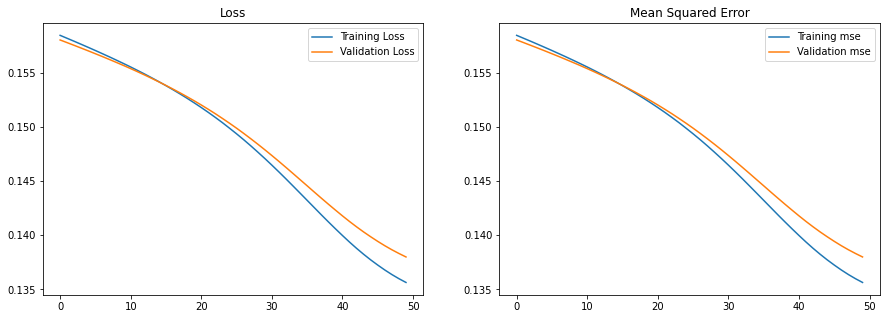

In [ ]:
# plot loss during training
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.title('Loss')
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
# plot MSE during training
plt.subplot(122)
plt.title('Mean Squared Error')
plt.plot(history.history['mse'], label='Training mse')
plt.plot(history.history['val_mse'], label='Validation mse')
plt.legend()
plt.show()


## Evaluation Metrics- For existing model
* Retina


In [ ]:
y_probs_retina_exs = model.predict(X_test_retina, verbose=0)
# predict crisp classes for test set
y_classes_retina_exs = np.argmax(model.predict(X_test_retina),axis=1)

# reduce to 1d array
y_probs_retina_exs = y_probs_retina_exs[:, 0]
rounded_labels=np.argmax(y_test_retina, axis=1)

In [ ]:
# accuracy: (tp + tn) / (p + n)
accuracy_retina_exs = accuracy_score(rounded_labels, y_classes_retina_exs)
print('Accuracy: %f' % accuracy_derma_exs)
# precision tp / (tp + fp)
precision_retina_exs = precision_score(rounded_labels, y_classes_retina_exs,pos_label='positive', average='micro')
print('Precision: %f' % precision_derma_exs)
# recall: tp / (tp + fn)
recall_retina_exs = recall_score(rounded_labels, y_classes_retina_exs,pos_label='positive', average='weighted')
print('Recall: %f' % recall_derma_exs)
# f1: 2 tp / (2 tp + fp + fn)
f1_retina_exs = f1_score(rounded_labels, y_classes_retina_exs,pos_label='positive', average='weighted')
print('F1 score: %f' % f1_derma_exs)
print('Confusion Matrix: \n', confusion_matrix(rounded_labels, y_classes_retina_exs))
print('\nClassification Report: \n',classification_report(rounded_labels, y_classes_retina_exs))

Accuracy: 0.694264
Precision: 0.694264
Recall: 0.694264
F1 score: 0.622925
Confusion Matrix: 
 [[174   0   0   0   0]
 [ 46   0   0   0   0]
 [ 92   0   0   0   0]
 [ 68   0   0   0   0]
 [ 20   0   0   0   0]]

Classification Report: 
               precision    recall  f1-score   support

           0       0.43      1.00      0.61       174
           1       0.00      0.00      0.00        46
           2       0.00      0.00      0.00        92
           3       0.00      0.00      0.00        68
           4       0.00      0.00      0.00        20

    accuracy                           0.43       400
   macro avg       0.09      0.20      0.12       400
weighted avg       0.19      0.43      0.26       400



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted sampl

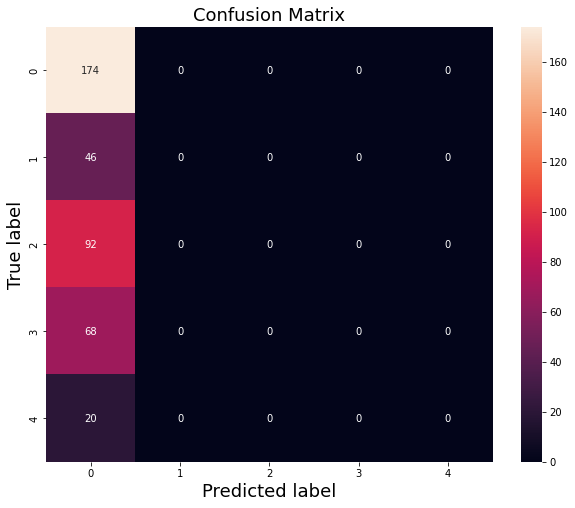

In [ ]:
# Plotting Confusion Matrix
cm =confusion_matrix(rounded_labels, y_classes_retina_exs)
plt.figure(figsize = (10,8))
sn.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix', fontsize=18)
plt.xlabel('Predicted label', fontsize=18)
plt.ylabel('True label', fontsize=18)
plt.show()

## Novel model
* Retina

In [ ]:
def create_cnn():
  # Declare a sequential model
  model = Sequential()

  # Conv Block 1
  # 64 filters and a network of 3X3
  model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu', input_shape=(28, 28, 3)))
  model.add(layers.Conv2D(64, (3, 3), activation='relu'))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(Dropout(0.25))
  # model.add(BatchNormalization(axis=-1))

  # Conv Block 2
  # 128 filters and a network of 3X3
  model.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
  model.add(layers.Conv2D(128, (3, 3), activation='relu'))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(Dropout(0.25))

  # Conv Block 3
  # 256 filters and a network of 3X3
  model.add(layers.Conv2D(256, (3, 3), padding='same', activation='relu'))
  model.add(layers.Conv2D(256, (3, 3), activation='relu'))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(Dropout(0.25))
  model.add(BatchNormalization(axis=-1))

  # Classifier
  # change it to 2D array with 5 dense
  model.add(layers.Flatten())
  model.add(layers.Dense(128, activation="relu"))
  model.add(Dropout(0.25))
  model.add(layers.Dense(5, activation="softmax"))

  return model

model = create_cnn()

# 'mse', 'mae', 'mape', 'cosine'
## for a mean squared error regression problem[10]
model.compile(optimizer='adam',
              loss='mse',metrics=['mse'])

#Fit model on training data
history = model.fit(X_train_retina, y_train_retina,validation_data=(X_test_retina,y_test_retina),
          batch_size=1500,
          epochs=50,
          verbose=1)

# Evaluate model on test data
score_retina_cnn = model.evaluate(X_test_retina, y_test_retina, verbose=0, batch_size=128)
print('Test loss:', score_retina_cnn[0])
print('Test mse:', score_retina_cnn[1])
print('The error is: %.2f%%'%(100-score_retina_cnn[1]*100))

Epoch 1/50
1/1 [==============================] - 1s 932ms/step - loss: 0.1723 - mse: 0.1723 - val_loss: 0.1597 - val_mse: 0.1597
Epoch 2/50
1/1 [==============================] - 0s 104ms/step - loss: 0.1603 - mse: 0.1603 - val_loss: 0.1593 - val_mse: 0.1593
Epoch 3/50
1/1 [==============================] - 0s 106ms/step - loss: 0.1542 - mse: 0.1542 - val_loss: 0.1586 - val_mse: 0.1586
Epoch 4/50
1/1 [==============================] - 0s 107ms/step - loss: 0.1397 - mse: 0.1397 - val_loss: 0.1569 - val_mse: 0.1569
Epoch 5/50
1/1 [==============================] - 0s 103ms/step - loss: 0.1363 - mse: 0.1363 - val_loss: 0.1553 - val_mse: 0.1553
Epoch 6/50
1/1 [==============================] - 0s 107ms/step - loss: 0.1317 - mse: 0.1317 - val_loss: 0.1549 - val_mse: 0.1549
Epoch 7/50
1/1 [==============================] - 0s 111ms/step - loss: 0.1234 - mse: 0.1234 - val_loss: 0.1564 - val_mse: 0.1564
Epoch 8/50
1/1 [==============================] - 0s 106ms/step - loss: 0.1394 - mse: 0.13

In [ ]:
# Save the model
model.save('cnn_retina_novel.h5')

## Evaluation Metrics- For Imbalanced data

In [ ]:
y_probs_retina_cnn = model.predict(X_test_retina, verbose=0)
# predict crisp classes for test set
y_classes_retina_cnn = np.argmax(model.predict(X_test_retina),axis=1)

# reduce to 1d array
y_probs_retina_cnn = y_probs_retina_cnn[:, 0]
rounded_labels=np.argmax(y_test_retina, axis=1)

In [ ]:
# accuracy: (tp + tn) / (p + n)
accuracy_retina_cnn = accuracy_score(rounded_labels, y_classes_retina_cnn)
print('Accuracy: %f' % accuracy_retina_cnn)
# precision tp / (tp + fp)
precision_retina_cnn = precision_score(rounded_labels, y_classes_retina_cnn,pos_label='positive', average='micro')
print('Precision: %f' % precision_retina_cnn)
# recall: tp / (tp + fn)
recall_retina_cnn = recall_score(rounded_labels, y_classes_retina_cnn,pos_label='positive', average='weighted')
print('Recall: %f' % recall_retina_cnn)
# f1: 2 tp / (2 tp + fp + fn)
f1_retina_cnn = f1_score(rounded_labels, y_classes_retina_cnn,pos_label='positive', average='weighted')
print('F1 score: %f' % f1_retina_cnn)
print('Confusion Matrix: \n', confusion_matrix(rounded_labels, y_classes_retina_cnn))
print('\nClassification Report: \n',classification_report(rounded_labels, y_classes_retina_cnn))

Accuracy: 0.435000
Precision: 0.435000
Recall: 0.435000
F1 score: 0.263728
Confusion Matrix: 
 [[174   0   0   0   0]
 [ 46   0   0   0   0]
 [ 92   0   0   0   0]
 [ 68   0   0   0   0]
 [ 20   0   0   0   0]]

Classification Report: 
               precision    recall  f1-score   support

           0       0.43      1.00      0.61       174
           1       0.00      0.00      0.00        46
           2       0.00      0.00      0.00        92
           3       0.00      0.00      0.00        68
           4       0.00      0.00      0.00        20

    accuracy                           0.43       400
   macro avg       0.09      0.20      0.12       400
weighted avg       0.19      0.43      0.26       400



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted sampl

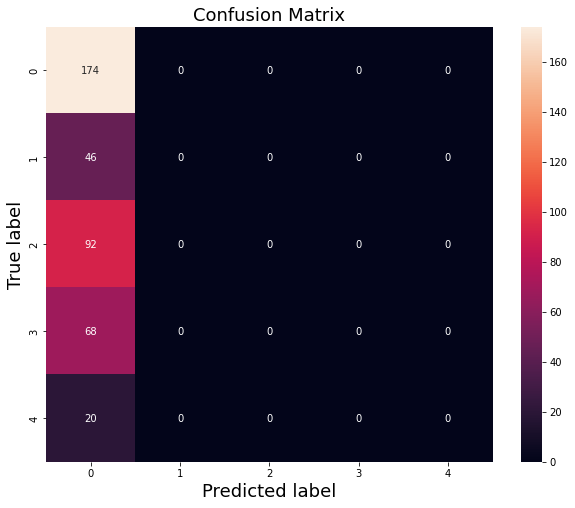

In [ ]:
# Plotting Confusion Matrix
cm =confusion_matrix(rounded_labels, y_classes_retina_cnn)
plt.figure(figsize = (10,8))
sn.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix', fontsize=18)
plt.xlabel('Predicted label', fontsize=18)
plt.ylabel('True label', fontsize=18)
plt.show()

## Plotting Loss and Mean Squared Error

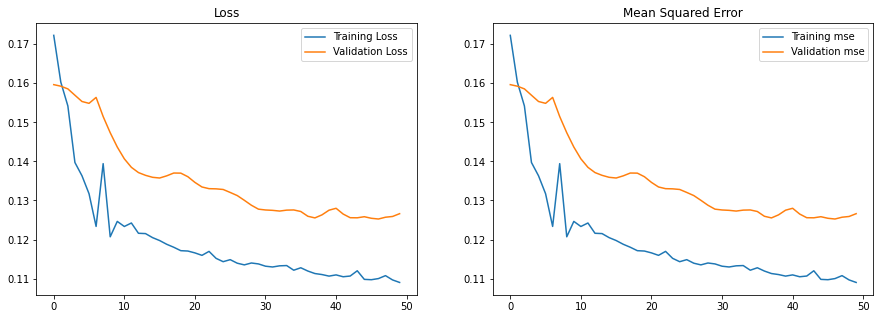

In [ ]:
# plot loss during training
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.title('Loss')
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
# plot MSE during training
plt.subplot(122)
plt.title('Mean Squared Error')
plt.plot(history.history['mse'], label='Training mse')
plt.plot(history.history['val_mse'], label='Validation mse')
plt.legend()
plt.show()


## Evaluation Metrics-For Balanced dataset
* Retina

In [ ]:
history = model.fit(X_train_retina, y_train_retina,validation_data=(X_val_retina,y_val_retina),
          batch_size=1000,
          epochs=10,
          verbose=1,
          class_weight=W2) # we add weights here
          
# Evaluate model on test data
score_retina_cnn_balanced = model.evaluate(X_test_retina, y_test_retina, verbose=0, batch_size=128)
print('Test loss:', score_retina_cnn_balanced[0])
print('Test mse:', score_retina_cnn_balanced[1])
# print('Test val_top_k_accuracy:', score_retina_cnn_balanced[2])
print('The error is: %.2f%%'%(100-score_retina_cnn_balanced[1]*100))
####################################################
y_probs_retina_cnn_balanced = model.predict(X_test_retina, verbose=0)
# predict crisp classes for test set
y_classes_retina_cnn_balanced = np.argmax(model.predict(X_test_retina),axis=1)

# reduce to 1d array
y_probs_retina_cnn_balanced = y_probs_retina_cnn_balanced[:, 0]
rounded_labels=np.argmax(y_test_retina, axis=1)
###################################################
# accuracy: (tp + tn) / (p + n)
accuracy_retina_cnn_balanced = accuracy_score(rounded_labels, y_classes_retina_cnn_balanced)
print('Accuracy: %f' % accuracy_retina_cnn_balanced)
# precision tp / (tp + fp)
precision_retina_cnn_balanced = precision_score(rounded_labels, y_classes_retina_cnn_balanced,pos_label='positive', average='micro')
print('Precision: %f' % precision_retina_cnn_balanced)
# recall: tp / (tp + fn)
recall_retina_cnn_balanced = recall_score(rounded_labels, y_classes_retina_cnn_balanced,pos_label='positive', average='weighted')
print('Recall: %f' % recall_retina_cnn_balanced)
# f1: 2 tp / (2 tp + fp + fn)
f1_retina_cnn_balanced = f1_score(rounded_labels, y_classes_retina_cnn_balanced,pos_label='positive', average='weighted')
print('F1 score: %f' % f1_retina_cnn_balanced)
print('Confusion Matrix: \n', confusion_matrix(rounded_labels, y_classes_retina_cnn_balanced))
print('\nClassification Report: \n',classification_report(rounded_labels, y_classes_retina_cnn_balanced))

Epoch 1/10
2/2 [==============================] - 1s 60ms/step - loss: 0.0423 - mse: 0.1077 - val_loss: 0.1225 - val_mse: 0.1225
Epoch 2/10
2/2 [==============================] - 0s 31ms/step - loss: 0.0427 - mse: 0.1093 - val_loss: 0.1270 - val_mse: 0.1270
Epoch 3/10
2/2 [==============================] - 0s 33ms/step - loss: 0.0427 - mse: 0.1097 - val_loss: 0.1230 - val_mse: 0.1230
Epoch 4/10
2/2 [==============================] - 0s 37ms/step - loss: 0.0433 - mse: 0.1116 - val_loss: 0.1302 - val_mse: 0.1302
Epoch 5/10
2/2 [==============================] - 0s 36ms/step - loss: 0.0437 - mse: 0.1125 - val_loss: 0.1272 - val_mse: 0.1272
Epoch 6/10
2/2 [==============================] - 0s 32ms/step - loss: 0.0434 - mse: 0.1109 - val_loss: 0.1248 - val_mse: 0.1248
Epoch 7/10
2/2 [==============================] - 0s 33ms/step - loss: 0.0433 - mse: 0.1107 - val_loss: 0.1261 - val_mse: 0.1261
Epoch 8/10
2/2 [==============================] - 0s 35ms/step - loss: 0.0433 - mse: 0.1104 - val

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted sampl

In [ ]:
# Save the model
model.save('cnn_retina_novel_balanced.h5')

In [ ]:
cm =confusion_matrix(rounded_labels, y_classes_retina_cnn_balanced)
plt.figure(figsize = (10,8))
sn.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix', fontsize=18)
plt.xlabel('Predicted label', fontsize=18)
plt.ylabel('True label', fontsize=18)
plt.show()

## Plotting the Loss and Mean Squared Error

In [ ]:
# plot loss during training
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.title('Loss')
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
# plot MSE during training
plt.subplot(122)
plt.title('Mean Squared Error')
plt.plot(history.history['mse'], label='Training mse')
plt.plot(history.history['val_mse'], label='Validation mse')
plt.legend()
plt.show()

## Data Augmentation
* Retina(using CNN)

In [ ]:
model = create_cnn()
model.compile(optimizer='adam',
              loss='mse',metrics=['mse'])
epochs=5
batch_size = 256
data_augmentation = True

if not data_augmentation:
  print("Training without augmentation.")
  model.fit(X_train_retina,y_train_retina, batch_size = batch_size,
            epochs = epochs,
            validation_data = (X_test_retina, y_test_retina),
            shuffle = True)

else:
  print("Training using real_time data augmentation.")
  datagen = ImageDataGenerator(
      featurewise_center = False,
      samplewise_center = False,
      featurewise_std_normalization = False,
      samplewise_std_normalization = False,
      zca_whitening = False,
      rotation_range = 0,
      width_shift_range = 0.1,
      height_shift_range = 0.1,
      horizontal_flip = True,
      vertical_flip = False)
  
  datagen.fit(X_train_retina)
  model.fit_generator(datagen.flow(X_train_retina,y_train_retina),
                      epochs = epochs,
                      validation_data = (X_test_retina, y_test_retina))


In [ ]:
# Save the model
model.save('cnn_retina_aug.h5')

In [ ]:
score_retina_aug = model.evaluate(X_test_retina, y_test_retina, batch_size = 250)

## Evaluation Metrics after Data Augmentation
* Retina

In [ ]:
yaug_probs_retina = model.predict(X_test_retina, verbose=0)
# predict crisp classes for test set
yaug_classes_retina = np.argmax(model.predict(X_test_retina),axis=1)

# reduce to 1d array
yaug_probs_retina = yaug_probs_retina[:, 0]
rounded_labels=np.argmax(y_test_retina, axis=1)

In [ ]:
# accuracy: (tp + tn) / (p + n)
accuracy_retina_aug = accuracy_score(rounded_labels, yaug_classes_retina)
print('Accuracy: %f' % accuracy_retina_aug)
# precision tp / (tp + fp)
precision_retina_aug = precision_score(rounded_labels, yaug_classes_retina,pos_label='positive', average='micro')
print('Precision: %f' % precision_retina_aug)
# recall: tp / (tp + fn)
recall_retina_aug = recall_score(rounded_labels, yaug_classes_retina,pos_label='positive', average='weighted')
print('Recall: %f' % recall_retina_aug)
# f1: 2 tp / (2 tp + fp + fn)
f1_retina_aug = f1_score(rounded_labels, yaug_classes_retina,pos_label='positive', average='weighted')
print('F1 score: %f' % f1_retina_aug)
print('Confusion Matrix: \n', confusion_matrix(rounded_labels, yaug_classes_retina))
print('\nClassification Report: \n',classification_report(rounded_labels, yaug_classes_retina))

In [ ]:
# Plotting Confusion Matrix
cm =confusion_matrix(rounded_labels, yaug_classes_retina)
plt.figure(figsize = (10,8))
sn.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix', fontsize=18)
plt.xlabel('Predicted label', fontsize=18)
plt.ylabel('True label', fontsize=18)
plt.show()

## Predicting class for new images
* retina(using CNN)

In [ ]:
plt.figure(figsize=(12, 24))
idx = np.random.choice(len(X_test_retina), 10, replace= False)

p = model.predict(X_test_retina[idx])

for i in range(len(idx)):
  plt.subplot(10,2,2*i+1)
  plt.imshow(X_test_retina[idx[i]], interpolation="spline16")
  plt.title(np.unique(retinaMNIST_data['test_labels'][idx[i]]))
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  pred_label = np.argsort(-p[i])[:3]
  pred_prob = [p[i][l] for l in pred_label]
  pred_label = [np.unique(retinaMNIST_data['test_labels'])[l] for l in pred_label]
  
  plt.subplot(10, 2, 2*i+2)
  plt.bar(range(3), pred_prob)
  plt.xticks(range(3), pred_label)

plt.show()
                          
                          
                          

##Plotting the Loss and Mean Squared Error
* Retina

In [ ]:
# plot loss during training
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.title('Loss')
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
# plot MSE during training
plt.subplot(122)
plt.title('Mean Squared Error')
plt.plot(history.history['mse'], label='Training mse')
plt.plot(history.history['val_mse'], label='Validation mse')
plt.legend()
plt.show()


## Inspecting the output


* Retina(using CNN)

In [ ]:
# select 25 random images from the test images
idx = np.random.choice(X_test_retina.shape[0],25, replace= False)

# predict class for selected images
y_pred_retina = np.argmax(model.predict(X_test_retina[idx]), axis=-1)

# True class for selected images
y_true_retina = y_test_retina[idx].argmax(axis=1)

In [ ]:
fig, axes = plt.subplots(5, 5, figsize=(18, 18))
for i , ax in enumerate(axes.flat):
  ax.imshow(X_test_retina[idx[i]].reshape(28,28,3), interpolation='spline16')
  pred_class = np.unique(retinaMNIST_data['train_labels'][y_pred_retina[i]])
  true_class = np.unique(retinaMNIST_data['train_labels'][y_true_retina[i]])
  ax.set_xlabel('pred: {}\n True: {}'.format(pred_class, true_class), fontsize=12)
  ax.set_xticks([])
  ax.set_yticks([])

# **Define the Second Model for RetinaMNIST**

## MLP
* Retina

In [ ]:
# For CNN we need 4D array, while for DNN we need 2D array
# Pre-Processing for retina dataset
X_train_retina = X_train_retina.reshape(1080, 2352)
X_test_retina = X_test_retina.reshape(400, 2352)
X_val_retina = X_val_retina.reshape(120, 2352)

X_train_retina = X_train_retina.astype('float32')
X_test_retina = X_test_retina.astype('float32')
X_val_retinaderma= X_val_retina.astype('float32')

mu = np.mean(X_train_retina, axis=0)
X_train_retina -= mu
X_test_retina -= mu

X_train_retina /= 255
X_test_retina /= 255
X_val_retina /= 255

#################################################
print("Matrices of RetinaMNIST :")
print("Training matrix shape", X_train_retina.shape)
print("Testing matrix shape", X_test_retina.shape)
print("Val matrix shape", X_val_retina.shape)


In [ ]:
# network parameters
batch_size = 256
hidden_units = 300
dropout = 0.5

model = Sequential()

# first hidden layer
model.add(Dense(hidden_units, input_dim=2352))
model.add(Activation('relu'))
model.add(Dropout(dropout))

# second hidden layer
model.add(Dense(hidden_units))
model.add(Activation('relu'))
model.add(Dropout(dropout))

# third hidden layer
model.add(Dense(hidden_units))
model.add(Activation('relu'))
model.add(Dropout(dropout))

# forth hidden layer
model.add(Dense(hidden_units))
model.add(Activation('relu'))
model.add(Dropout(dropout))

# fifth hidden layer
model.add(Dense(hidden_units))
model.add(Activation('relu'))
model.add(Dropout(dropout))

# sixth hidden layer
model.add(Dense(hidden_units))
model.add(Activation('relu'))
model.add(Dropout(dropout))

model.add(Dense(5))
model.add(Activation('softmax'))

In [ ]:
# 'mse', 'mae', 'mape', 'cosine'
## for a mean squared error regression problem
model.compile(optimizer='adam',
              loss='mse',metrics=['mse'])

# for DNN we need 2D so we should reshape it again
history = model.fit(X_train_retina, y_train_retina,epochs=20, batch_size=batch_size,validation_data=(X_test_retina,y_test_retina))
loss_retina_mlp, mse_retina_mlp = model.evaluate(X_test_retina, y_test_retina, batch_size=batch_size)
print("\nTest mse: %.1f%%" % (100.0 * mse_retina_mlp))
print("\nTest loss: %.1f%%" % (loss_retina_mlp))

In [ ]:
# Save the model
model.save('cnn_retina_mlp.h5')

## Evaluation Metrics

In [ ]:
y_probs_retina_mlp = model.predict(X_test_retina, verbose=0)
# predict crisp classes for test set
y_classes_retina_mlp = np.argmax(model.predict(X_test_retina),axis=1)

# reduce to 1d array
y_probs_retina_mlp = y_probs_retina_mlp[:, 0]
rounded_labels=np.argmax(y_test_retina, axis=1)

In [ ]:
# accuracy: (tp + tn) / (p + n)
accuracy_retina_mlp = accuracy_score(rounded_labels, y_classes_retina_mlp)
print('Accuracy: %f' % accuracy_retina_mlp)
# precision tp / (tp + fp)
precision_retina_mlp = precision_score(rounded_labels, y_classes_retina_mlp,pos_label='positive', average='micro')
print('Precision: %f' % precision_retina_mlp)
# recall: tp / (tp + fn)
recall_retina_mlp = recall_score(rounded_labels, y_classes_retina_mlp,pos_label='positive', average='weighted')
print('Recall: %f' % recall_retina_mlp)
# f1: 2 tp / (2 tp + fp + fn)
f1_retina_mlp = f1_score(rounded_labels, y_classes_retina_mlp,pos_label='positive', average='weighted')
print('F1 score: %f' % f1_retina_mlp)
print('Confusion Matrix: \n', confusion_matrix(rounded_labels, y_classes_retina_mlp))
print('\nClassification Report: \n',classification_report(rounded_labels, y_classes_retina_mlp))

In [ ]:
# Plotting Confusion Matrix
cm =confusion_matrix(rounded_labels, y_classes_retina_mlp)
plt.figure(figsize = (10,8))
sn.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix', fontsize=18)
plt.xlabel('Predicted label', fontsize=18)
plt.ylabel('True label', fontsize=18)
plt.show()

##Plotting the Loss and Mean Squared Error
* Retina

In [ ]:
# plot loss during training
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.title('Loss')
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
# plot MSE during training
plt.subplot(122)
plt.title('Mean Squared Error')
plt.plot(history.history['mse'], label='Training mse')
plt.plot(history.history['val_mse'], label='Validation mse')
plt.legend()
plt.show()


# **Comparison of All Models' Metrics**

In [ ]:
print("******************************************************************************")
print("******************************************************************************")
print("******************************************************************************")
print("**********************************DermaMNIST**********************************")
print("\n*************************CNN(Existing Model)********************************")
print("The result for Test Loss is  :               ", score_derma_exs[0])
print("The result for Test Accuracy is  :           ", score_derma_exs[1])
print("The result for Test Precision is  :          ", precision_derma_exs)
print("The result for Test Recall is  :             ", recall_derma_exs)
print("The result for Test F1_score is  :           ", f1_derma_exs)
print("\n*********************CNN(Novel Model-Imbalanced Data)***********************")
print("The result for Test Loss is  :               ", score_derma_cnn[0])
print("The result for Test Accuracy is  :           ", score_derma_cnn[1])
print("The result for Test Precision is  :          ", precision_derma_cnn)
print("The result for Test Recall is  :             ", recall_derma_cnn)
print("The result for Test F1_score is  :           ", f1_derma_cnn)
print("\n**********************CNN(Novel Model-Balanced Data)************************")
print("The result for Test Loss is  :               ", score_derma_cnn_balanced[0])
print("The result for Test Accuracy is  :           ", score_derma_cnn_balanced[1])
print("The result for Test Precision is  :          ", precision_derma_cnn_balanced)
print("The result for Test Recall is  :             ", recall_derma_cnn_balanced)
print("The result for Test F1_score is  :           ", f1_derma_cnn_balanced)
print("\n*******************CNN(Novel Model-using Data Augmentation)*****************")
print("The result for Test Loss is  :               ", score_derma_aug[0])
print("The result for Test Accuracy is  :           ", score_derma_aug[1])
print("The result for Test Precision is  :          ", precision_derma_aug)
print("The result for Test Recall is  :             ", recall_derma_aug)
print("The result for Test F1_score is  :           ", f1_derma_aug)
print("\n***************************MLP(Novel Model)*********************************")
print("The result for Test Loss is  :               ", loss_derma_mlp)
print("The result for Test Accuracy is  :           ", acc_derma_mlp)
print("The result for Test Precision is  :          ", precision_derma_mlp)
print("The result for Test Recall is  :             ", recall_derma_mlp)
print("The result for Test F1_score is  :           ", f1_derma_mlp)
print("\n********************MLP(Novel Model-using over_sampling)********************")
print("The result for Test Loss is  :               ", loss_ros)
print("The result for Test Accuracy is  :           ", acc_ros)
print("The result for Test Precision is  :          ", precision_derma_mlp_ros)
print("The result for Test Recall is  :             ", recall_derma_mlp_ros)
print("The result for Test F1_score is  :           ", f1_derma_mlp_ros)
print("******************************************************************************")
print("******************************************************************************")
print("******************************************************************************")
print("**********************************RetinaMNIST*********************************")
print("\n*************************CNN(Existing Model)********************************")
print("The result for Test Loss is  :               ", score_retina_exs[0])
print("The result for Test MSE is  :                ", score_retina_exs[1])
print("The result for Test Accuracy is  :           ", accuracy_retina_exs)
print("The result for Test Precision is  :          ", precision_retina_exs)
print("The result for Test Recall is  :             ", recall_retina_exs)
print("The result for Test F1_score is  :           ", f1_retina_exs)
print("\n**********************CNN(Novel Model-Imbalanced Data)**********************")
print("The result for Test Loss is  :               ", score_retina_cnn[0])
print("The result for Test MSE is  :                ", score_retina_cnn[1])
print("The result for Test Accuracy is  :           ", accuracy_retina_cnn)
print("The result for Test Precision is  :          ", precision_retina_cnn)
print("The result for Test Recall is  :             ", recall_retina_cnn)
print("The result for Test F1_score is  :           ", f1_retina_cnn)
print("\n**********************CNN(Novel Model-balanced Data)************************")
print("The result for Test Loss is  :               ", score_retina_cnn_balanced[0])
print("The result for Test MSE is  :                ", score_retina_cnn_balanced[1])
print("The result for Test Accuracy is  :           ", accuracy_retina_cnn_balanced)
print("The result for Test Precision is  :          ", precision_retina_cnn_balanced)
print("The result for Test Recall is  :             ", recall_retina_cnn_balanced)
print("The result for Test F1_score is  :           ", f1_retina_cnn_balanced)
print("\n*******************CNN(Novel Model-using Data Augmentation)*****************")
print("The result for Test Loss is  :               ", score_retina_aug[0])
print("The result for Test MSE is  :                ", score_retina_aug[1])
print("The result for Test Accuracy is  :           ", accuracy_retina_aug)
print("The result for Test Precision is  :          ", precision_retina_aug)
print("The result for Test Recall is  :             ", recall_retina_aug)
print("The result for Test F1_score is  :           ", f1_retina_aug)
print("\n****************************MLP(Novel Model)********************************")
print("The result for Test Loss is  :               ", loss_retina_mlp)
print("The result for Test MSE is  :                ", mse_retina_mlp)
print("The result for Test Accuracy is  :           ", accuracy_retina_mlp)
print("The result for Test Precision is  :          ", precision_retina_mlp)
print("The result for Test Recall is  :             ", recall_retina_mlp)
print("The result for Test F1_score is  :           ", f1_retina_mlp)


# **Creating a UI using Streamlit**

In [ ]:
!pip install streamlit
!pip install pyngrok

In [ ]:
# adapted from source [11]
%%writefile app.py
import keras
import streamlit as st
from PIL import Image, ImageOps
import numpy as np


# loading the four best models
DM_novel = keras.models.load_model('cnn_derma_novel_balanced.h5')
DM_AUG = keras.models.load_model('cnn_derma_aug.h5')
RM_novel = keras.models.load_model('cnn_retina_novel_balanced.h5')
RM_AUG = keras.models.load_model('cnn_retina_aug.h5')

# import os
# creating a function to view the image file

# creating the function to predict the image (adapted from source [11])
def img_load(img):
  # Create the array of the right shape to feed into the keras model
  img_data = np.ndarray(shape=(1,28,28,3), dtype=np.float32)
  image = img
  #image sizing
  size = (28, 28)
  image = ImageOps.fit(image, size, Image.ANTIALIAS)

  #turn the image into a numpy array
  img_array = np.asarray(image)
  # Normalize the image
  normalized_img_array = (img_array.astype(np.float32) / 255.0)

  # Load the image into the array
  img_data[0] = normalized_img_array
  return img_data

def main():
  # creating a list off all uploaded images
  st.title('Medical Image Analysis and Classification')
    
  menu = ['DermaMNIST','RetinaMNIST']
  choice = st.sidebar.selectbox('Choose a Dataset',menu)
  
  if choice == 'DermaMNIST':
    st.subheader('DermaMNIST Machine Learning Models')
    upload_image = st.file_uploader('Upload Images', type=['jpg','jpeg'])
    if upload_image is not None:
      # opening the image 
      image_1 = Image.open(upload_image)
      st.image(image_1, caption='Uploaded Image.', use_column_width=False)
      img_1 = img_load(image_1)
      
      st.write('CNN with Balanced Data :')
      DM_nov = DM_novel.predict(img_1)
      acc = np.amax(DM_nov)
      class_predict = np.argmax(DM_nov) # gives the prediction in an integer value
      st.write('  Class predicted: ', class_predict)
      st.write('  Accuracy: ', acc)
      
      st.write('CNN with Augmented Data:')
      DM_aug = DM_AUG.predict(img_1)
      acc = np.amax(DM_aug)
      class_predict = np.argmax(DM_aug) # gives the prediction in an integer value
      st.write('  Class predicted: ', class_predict)
      st.write('  Accuracy: ', acc)
  
  elif choice == 'RetinaMNIST':
    st.subheader('RetinaMNIST Machine Learning Models')
    upload_image= st.file_uploader('Upload Images', type=['jpg','jpeg'])
    if upload_image is not None:
      # opening the image 
      image_2 = Image.open(upload_image)
      st.image(image_2, caption='Uploaded Image.', use_column_width=False)
      img_2 = img_load(image_2)
      
      st.write('CNN with Balanced Data:')
      RM_nov = RM_novel.predict(img_2)
      acc = np.amax(RM_nov)
      class_predict = np.argmax(RM_nov) # gives the prediction in an integer value
      st.write('  Class predicted: ', class_predict)
      st.write('  Accuracy: ', acc)

      st.write('CNN with Augmented Data:')
      RM_aug = RM_AUG.predict(img_2)
      acc = np.amax(RM_aug)
      class_predict = np.argmax(RM_aug) # gives the prediction in an integer value
      st.write('  Class predicted: ', class_predict)
      st.write('  Accuracy: ', acc)
    
  
if __name__ == '__main__':
  main()

In [ ]:
!ngrok
!ngrok authtoken 263qd4RQvu1mbqsCg2hO265BcRr_3q4rjJHEuCQqZLpSUnJSa

In [ ]:
from pyngrok import ngrok

In [ ]:
# to run streamlit in background - Lynyx Command
!streamlit run --server.port 80 app.py &>/dev/null&

In [ ]:
# to check if streamlit is running or not 
!pgrep streamlit

In [ ]:
print(tf.__version__)

In [ ]:
# to configure the port in ngrok
publ_url = ngrok.connect(port='8501')
# displays the URL value
publ_url

# **Reference**

[1] (2019, Jan). Is there a way to convert npz files to panda dataframe? [Online]. Available: https://stackoverflow.com/questions/59113331/is-there-a-way-to-convert-npz-files-to-panda-dataframe

[2] The Data Frog. Visualizing Datasets [Online]. Available: https://thedatafrog.com/en/articles/visualizing-datasets/

[3] V. Zhou. (2019, Jun. 14). Keras for Beginners: Building Your First Neural Network [Online]. Available: https://victorzhou.com/blog/keras-neural-network-tutorial/ 

[4] (2017, Sep). How to set class weights for imbalanced classes in Keras? [Online]. Available: https://datascience.stackexchange.com/questions/13490/how-to-set-class-weights-for-imbalanced-classes-in-keras

[5] Analytics Vidhya. (2020, Jul. 23). 10 Techniques to deal with Imbalanced Classes in Machine Learning [Online]. Available: https://www.analyticsvidhya.com/blog/2020/07/10-techniques-to-deal-with-class-imbalance-in-machine-learning/

[6] V. Argyriou. ‘Machine Learning and Artificial Intelligence - CI7520: Deep Learning Examples and Libraries’, Kingston University London, 2022. Available: https://app.box.com/embed/s/vmq55ddonpqqnh7seynvvjv8o08kdnes?partner_id=&showItemFeedActions=true&showParentPath=true&sortColumn=name&sortDirection=ASC&viewSize=0&view=list

[7] J. Brownlee. (2020, Aug. 27). How to Calculate Precision, Recall, F1, and More for Deep Learning Models [Online]. Available: https://machinelearningmastery.com/how-to-calculate-precision-recall-f1-and-more-for-deep-learning-models/

[8] J. Brownlee. (2019, Apr. 12). How to Configure Image Data Augmentation in Keras [Online]. Available: https://machinelearningmastery.com/how-to-configure-image-data-augmentation-when-training-deep-learning-neural-networks/

[9] (2021, May). How can I use “np.argmax()” instead of “classifier.predict_classes()”? [Online]. Available: https://stackoverflow.com/questions/67331570/how-can-i-use-np-argmax-instead-of-classifier-predict-classes 

[10] Getting Started with the Keras Sequential Model [Online]. Available: https://faroit.com/keras-docs/1.0.1/getting-started/sequential-model-guide/

[11] K. Thagana. (2020, Jun. 8). Deploying Image Classification on the Web with Streamlit and Heroku [Online]. Available: https://www.pluralsight.com/guides/deploying-image-classification-on-the-web-with-streamlit-and-heroku





